In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.signal import argrelextrema

import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.image as mpimg


from functions import Orbitload
from functions import load_yTag_data
from functions import load_data
from functions import load_Bfield
from functions import enlargeVector

In [2]:
timespan = interactive(Orbitload, Orbit = '')
print('Which timespan?')
display(timespan)

Which timespan?


interactive(children=(Text(value='', description='Orbit'), Output()), _dom_classes=('widget-interact',))

In [3]:
ProtonData = interactive(Orbitload, Orbit = '')
print('Proton dataset, e.g. HiResIon, LoTOFxE or HiTOFxE')
display(ProtonData)

Proton dataset, e.g. HiResIon, LoTOFxE or HiTOFxE


interactive(children=(Text(value='', description='Orbit'), Output()), _dom_classes=('widget-interact',))

In [8]:
answer_Orbit = timespan.kwargs['Orbit']
answer_Proton = ProtonData.kwargs['Orbit']

In [9]:
fileIntE_O = '%sEn_O'%answer_Orbit
fileIntE_S = '%sEn_S'%answer_Orbit
fileIntE_He = '%sEn_He'%answer_Orbit
fileIntE_H = '%sEn_%s_H'%(answer_Orbit, answer_Proton)
fileIntPA_O = '%sPA_O'%answer_Orbit
fileIntPA_S = '%sPA_S'%answer_Orbit
fileIntPA_He = '%sPA_He'%answer_Orbit
fileIntPA_H = '%sPA_%s_H'%(answer_Orbit, answer_Proton)
filedensO = '%sdens_O'%answer_Orbit
filedensS = '%sdens_S'%answer_Orbit
filedensHe = '%sdens_He'%answer_Orbit
filedensH = '%sdens_%s_H'%(answer_Orbit, answer_Proton)

In [10]:
# Parameters

m_O = 16*1.672*(10**(-27)); #[kg]
m_S = 32*1.67*(10**(-27)); #[kg]
m_He = 4*1.67*(10**(-27)); #[kg]
m_H = 1*1.67*(10**(-27)); #[kg]
header_mag = 1
header_dens = 14
yTag_En = 13
if answer_Proton == 'HiResIon' or answer_Proton == 'LoTOFxE':
    yTag_En_H = 13
if answer_Proton == 'HiTOFxE':
    yTag_En_H = 14
yTag_PA = 14
yTag_to_intens_En_S = 2
yTag_to_intens = 3

In [11]:
# Einlesen Energy&PA:
files_E = [[fileIntE_O, yTag_En, yTag_to_intens], [fileIntE_S, yTag_En, yTag_to_intens_En_S], 
         [fileIntE_He, yTag_En, yTag_to_intens], [fileIntE_H, yTag_En_H, yTag_to_intens]]
files_PA = [[fileIntPA_O, yTag_PA, yTag_to_intens], [fileIntPA_S, yTag_PA, yTag_to_intens],
           [fileIntPA_He, yTag_PA, yTag_to_intens], [fileIntPA_H, yTag_PA, yTag_to_intens]]

n_spec = len(files_E)
I_E = [[]]*n_spec
I_PA = [[]]*n_spec
for i,species in enumerate(files_E):
    I_E[i] = [load_yTag_data(species[0],species[1],species[2])][0]
for i,species in enumerate(files_PA):
    I_PA[i] = [load_yTag_data(species[0],species[1],species[2])][0]

In [12]:
# Einlesen density:
files_n = [filedensO, filedensS, filedensHe, filedensH]
n = [[]]*n_spec
for i,val in enumerate(files_n):
    n[i] = load_data(val, header_dens)

In [13]:
# Einlesen B-feld
B = [[] for k in range(9)]
B = load_Bfield(answer_Orbit, B, header_mag)

In [14]:
for i in range(0,4,1):
    print(np.mean(n[i])) # 1/cm^3

0.00055409955158
0.0009475520610669999
0.00070890956968
0.015770495282909996


In [15]:
# round minute & second values for allocation in 2.1.2

second_B = [int(round(val,0)) for val in B[4]]
minute_B = [int(round(val,0)) for val in B[3]]
min_sec_vec_B = np.transpose([minute_B, second_B])
min_sec_B = [float(f'{i[0]}.{i[1]}') for i in min_sec_vec_B]

In [16]:
# Linearisiere B-feld zum Plotten
day_B_vec = [B[1][0]+B[2][0]/24, B[1][-1]+B[2][-1]/24]
day_B_vec = enlargeVector(day_B_vec,len(B[-1]))

In [17]:
#from matplotlib.pyplot import *
# 
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')

C:\Users\michi\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


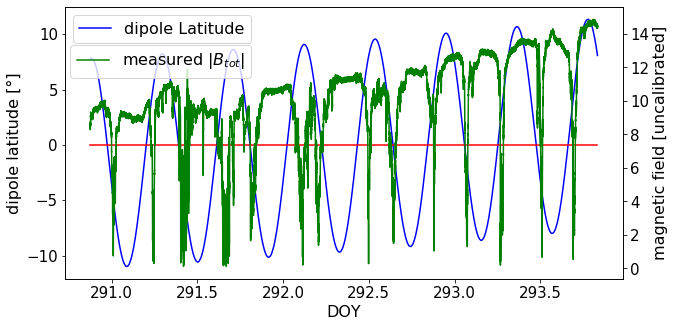

In [42]:
%matplotlib inline
fig,ax1 = plt.subplots(figsize=(10,5))

ax1.plot(day_B_vec, B[6], '-b', [day_B_vec[0], day_B_vec[-1]], [0,0], 'r')
ax1.set_xlabel('DOY',fontsize=16)
#ax1.set_xticklabels([B[0][0],92.11,90.51,88.89,87.26,85.63,83.99,82.35], fontsize=15)
ax1.set_ylabel('dipole latitude [°]', fontsize=16)
ax1.tick_params(labelsize=15)
ax1.legend(['dipole Latitude'],fontsize=16)
#ax1.tick_params(labelsize=15)


ax2 = ax1.twinx()
ax2.plot(day_B_vec, B[-1],'-g')
ax2.set_ylabel('magnetic field [uncalibrated]', fontsize=16)
ax2.legend(['measured $|B_{tot}|$'],fontsize=16, loc = [0.01,0.74])
ax2.tick_params(labelsize=15)

In [19]:
maglatExtr = argrelextrema(np.array(B[6]), np.greater_equal)
num = []
i_now = 0
for i,magval in enumerate(maglatExtr[0]):
    if abs(magval - i_now) > 1000:
        num.append(magval)
        i_now = magval
    else:
        continue

In [20]:
num_Nst = [] #alle maglat Indices die am nähesten an den Nullstellen sind. --> Für passage_inds zwischen den Nullstellen von maglat
for i in range(0,len(num)-1,1):
    a = [i for i in B[6][num[i]:(num[i+1]+1)]]
    numtemp = min(range(len(a)), key=lambda j: abs(a[j]-0))
    num_Nst.append(num[i]+numtemp)
a_0 = [i for i in B[6][0:(num[0]+1)]]
numtemp_0 = min(range(len(a_0)), key=lambda j: abs(a_0[j]-0))
num_Nst.insert(0,numtemp_0)

In [21]:
time_bb = []
R_bb = []
theta_bb = []
for i,Nst in enumerate(num_Nst):
    if i == len(num_Nst)-1:
        time_bb.append(abs(day_B_vec[num_Nst[i]+np.argmin(B[-1][num_Nst[i]:len(day_B_vec)-1])]-day_B_vec[num_Nst[i]])*24*60)
        R_bb.append(np.mean(B[-2][num_Nst[i]:num_Nst[i]+np.argmin(B[-1][num_Nst[i]:len(day_B_vec)-1])]))
        theta_bb.append(np.mean(B[-4][num_Nst[i]:num_Nst[i]+np.argmin(B[-1][num_Nst[i]:len(day_B_vec)-1])]))
    else:
        time_bb.append(abs(day_B_vec[num_Nst[i]+np.argmin(B[-1][num_Nst[i]:num_Nst[i+1]])]-day_B_vec[num_Nst[i]])*24*60)
        R_bb.append(np.mean(B[-2][num_Nst[i]:num_Nst[i]+np.argmin(B[-1][num_Nst[i]:num_Nst[i+1]])]))
        theta_bb.append(np.mean(B[-4][num_Nst[i]:num_Nst[i]+np.argmin(B[-1][num_Nst[i]:num_Nst[i+1]])]))

In [22]:
print(len(num_Nst),len(time_bb))

14 14


In [23]:
time_bb

[50.61686469823144,
 64.48358561649911,
 41.16682772621971,
 81.16698422133595,
 4.83335224313123,
 132.1671837526992,
 8.333365936523478,
 94.23370200976024,
 4.616684728798646,
 53.48354258033396,
 23.28342442653593,
 21.0834158193029,
 50.15019620574094,
 43.9501719490454]

In [24]:
theta_bb

[-1.5663380144879815,
 -1.3492439364176791,
 -1.1737887125506072,
 -0.9370774845995894,
 -0.7615099448275862,
 -0.4791392495586381,
 -0.300290958,
 -0.018190317597509727,
 0.19970514440433212,
 0.4826838061701465,
 0.7603327415891195,
 1.03679585770751,
 1.3888772681954138,
 1.682734603716344]

In [31]:
bb = [[]]*14

In [32]:
bb[3] = [theta_bb, R_bb, time_bb]

In [33]:
plt.plot(bb[1][1],bb[1][4])

IndexError: list index out of range

IndexError: list index out of range

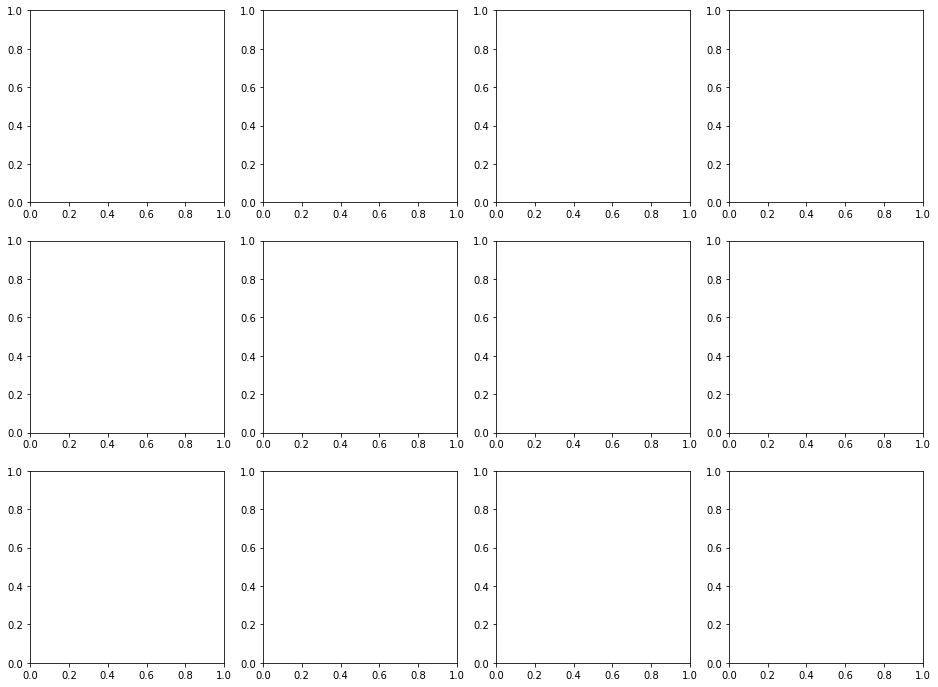

In [29]:
fig,ax = plt.subplots(3,4,figsize = (16,12))
ax = ax.ravel()

for i in range(1,12,1):
    ax[i].plot(bb[i][1],bb[i][2])

## sortieren

In [30]:
all_R = []
all_time_bb = []
all_theta = []
for i in range(1,12,1):
    for j,val in enumerate(bb[i][1]):
        all_R.append(val)
    for j,val in enumerate(bb[i][2]):
        all_time_bb.append(val)
    for j,val in enumerate(bb[i][0]):
        all_theta.append(val)

IndexError: list index out of range

In [31]:
all_time_bb

[]

In [45]:
all_theta

[]

In [ ]:
sortinds_R = np.argsort(all_R)
sort_R = np.sort(all_R)
# radial
indsort_all_R = []
for ind in sortinds_R:
    indsort_all_R.append(all_time_bb[ind])

In [551]:
sortinds_theta = np.argsort(all_theta)
sort_theta = np.sort(all_theta)
# latitudinal
indsort_all_theta = []
for ind in sortinds_theta:
    indsort_all_theta.append(all_time_bb[ind])

In [552]:
sort_theta

array([-3.76526038, -3.50780896, -3.33486611, -3.05920632, -2.88456241,
       -2.58409592, -2.37490581, -2.12176658, -2.05027102, -1.82330761,
       -1.81227321, -1.6253615 , -1.56633801, -1.48878301, -1.45445868,
       -1.44384731, -1.34924394, -1.32133265, -1.30262458, -1.2759771 ,
       -1.23570629, -1.21865719, -1.1998906 , -1.17378871, -1.15074166,
       -1.10938483, -1.07522506, -1.00905845, -0.9853877 , -0.96310547,
       -0.93707748, -0.93612422, -0.88192821, -0.82819726, -0.78066581,
       -0.77419781, -0.76150994, -0.7592142 , -0.74323595, -0.73350537,
       -0.65791483, -0.63556448, -0.62508542, -0.57866699, -0.54137753,
       -0.52417211, -0.49440329, -0.48482391, -0.47913925, -0.45169885,
       -0.4429546 , -0.4138244 , -0.40406354, -0.3721634 , -0.31439285,
       -0.30168943, -0.30029096, -0.29098824, -0.23442697, -0.1987632 ,
       -0.18918321, -0.15067043, -0.11078792, -0.10104086, -0.09573909,
       -0.07320879, -0.0581288 , -0.04435199, -0.01819032,  0.02

In [553]:
indsort_all_theta

[90.11695439640107,
 71.23356077128165,
 84.28360243805628,
 76.16690985604237,
 37.833454129799975,
 51.333497233376875,
 34.18344247586447,
 20.183520217780142,
 56.850181514000724,
 74.33402161131994,
 32.00010217145518,
 10.583431328063853,
 50.61686469823144,
 36.56681387604294,
 72.61689852138716,
 117.44316678942596,
 64.48358561649911,
 148.14888552014054,
 47.35019062074116,
 8.733416986760858,
 74.45516056643783,
 254.8190261020943,
 3.3500106960741505,
 41.16682772621971,
 25.550102858701393,
 113.70220051820752,
 10.016759414446597,
 93.90487458723783,
 88.46751405661962,
 17.116735574641098,
 81.16698422133595,
 107.21743032357949,
 123.58431053559343,
 114.10081268385454,
 99.90031896654273,
 114.31465959802154,
 4.83335224313123,
 117.05047121766256,
 47.267104325035234,
 102.334062208418,
 76.19322011724535,
 32.63352218473301,
 102.5507304183094,
 59.56690646901279,
 81.93709310891563,
 102.18406114003756,
 0.5833351958222011,
 64.61728560618212,
 132.1671837526992,
 7

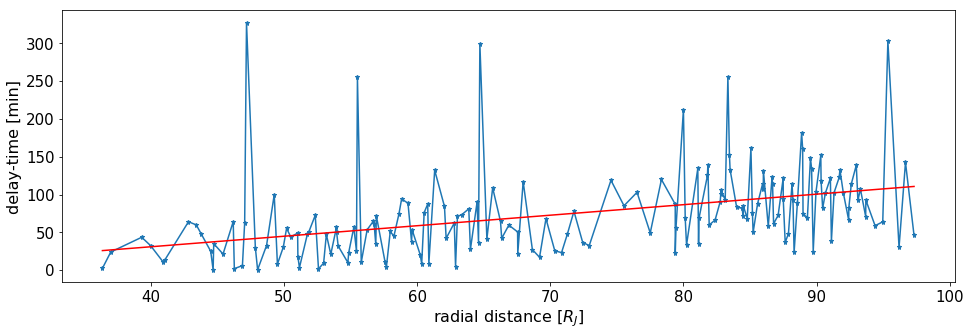

In [558]:
fig,ax = plt.subplots(1,1,figsize = (16,5))

A = np.vstack([sort_R[0:len(indsort_all_R)-1], np.ones(len(sort_R[0:len(indsort_all_R)-1]))]).T
m, c = np.linalg.lstsq(A, indsort_all_R[0:len(indsort_all_R)-1], rcond=None)[0]

ax.plot(sort_R[0:len(indsort_all_R)-1], indsort_all_R[0:len(indsort_all_R)-1], '-*', label='mean crossing thickness', markersize=5)
ax.plot(sort_R[0:len(indsort_all_R)-1], m*sort_R[0:len(indsort_all_R)-1] + c, 'r', label='linear least square y=m*x+c')

ax.set_xlabel('radial distance [$R_J$]', fontsize = 16)
ax.set_ylabel('delay-time [min]', fontsize = 16)
ax.tick_params(labelsize=15)

#fig.savefig('bend_back_R.pdf',bbox_inches='tight')

In [539]:
m

1.391162793957087

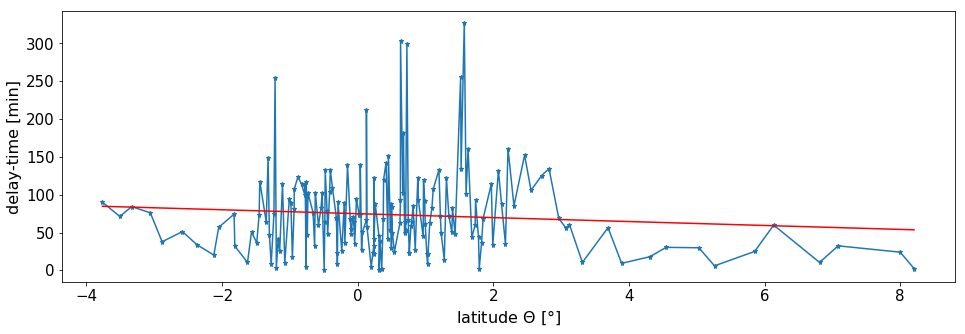

In [557]:
fig,ax = plt.subplots(1,1,figsize = (16,5))

A = np.vstack([sort_theta[0:len(indsort_all_theta)-1], np.ones(len(sort_theta[0:len(indsort_all_theta)-1]))]).T
m, c = np.linalg.lstsq(A, indsort_all_theta[0:len(indsort_all_theta)-1], rcond=None)[0]

ax.plot(sort_theta[0:len(indsort_all_theta)-1], indsort_all_theta[0:len(indsort_all_theta)-1], '-*', label='mean crossing thickness', markersize=5)
ax.plot(sort_theta[0:len(indsort_all_theta)-1], m*sort_theta[0:len(indsort_all_theta)-1] + c, 'r', label='linear least square y=m*x+c')

ax.set_xlabel('latitude $\Theta$ [°]', fontsize = 16)
ax.set_ylabel('delay-time [min]', fontsize = 16)
ax.tick_params(labelsize=15)

#fig.savefig('bend_back_theta.pdf',bbox_inches='tight')

(-1.0, 1.0)

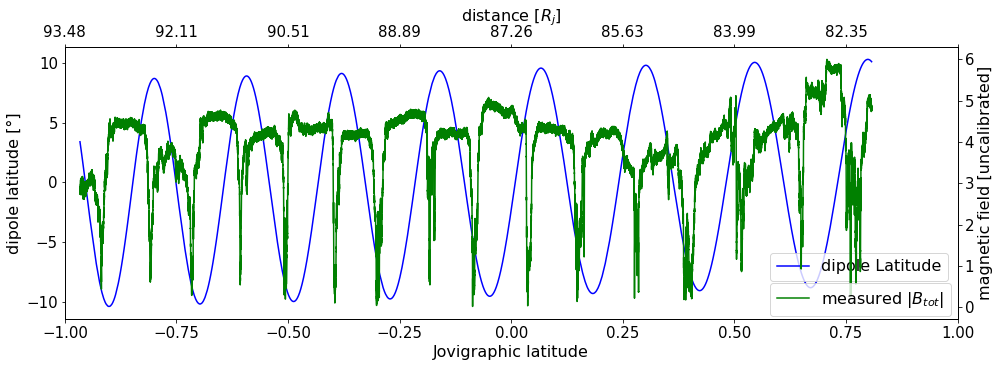

In [88]:
%matplotlib inline
fig,ax1 = plt.subplots(figsize=(16,5))

ax1.plot(np.array(B[5]), B[6], '-b')
ax1.set_xlabel('Jovigraphic latitude',fontsize=16)
ax1.set_xlim([-1,1])
ax1.set_ylabel('dipole latitude [°]', fontsize=16)
ax1.tick_params(labelsize=15)
ax1.legend(['dipole Latitude'],fontsize=16, loc = [0.79,0.14])
#ax1.tick_params(labelsize=15)


ax2 = ax1.twinx()
ax2.plot(np.array(B[5]), B[-1],'-g')
ax2.set_ylabel('magnetic field [uncalibrated]', fontsize=16)
ax2.legend(['measured $|B_{tot}|$'],fontsize=16, loc = [0.79,0.01])
ax2.tick_params(labelsize=15)

# Set scond x-axis
ax3 = ax1.twiny()
ax3.set_xticklabels([np.round(B[7][0],2),92.11,90.51,88.89,87.26,85.63,83.99,82.35], fontsize=15)
ax3.set_xlabel('distance [$R_j$]', fontsize=16)
ax3.set_xlim(ax1.get_xlim())
#fig.savefig('Orbit04_maglat_B.pdf',bbox_inches='tight')

(-1.0, 1.0)

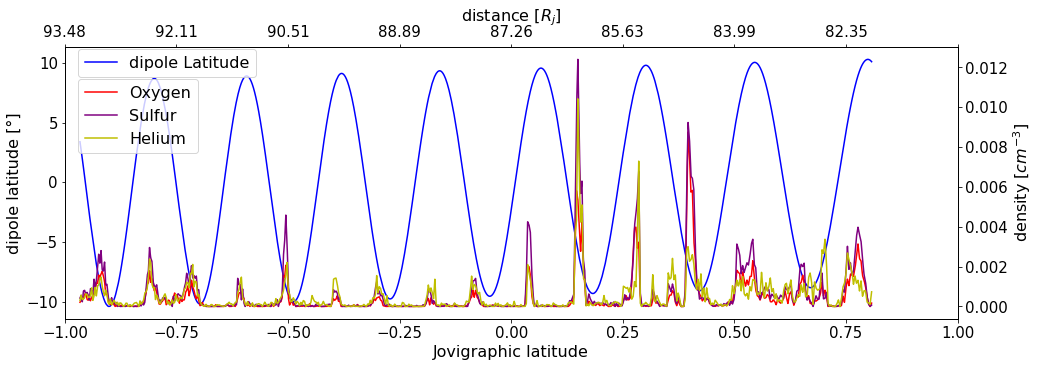

In [577]:
%matplotlib inline
fig,ax1 = plt.subplots(figsize=(16,5))

ax1.plot(np.array(B[5]), B[6], '-b')
ax1.set_xlabel('Jovigraphic latitude',fontsize=16)
ax1.set_xlim([-1,1])
ax1.set_ylabel('dipole latitude [°]', fontsize=16)
ax1.tick_params(labelsize=15)
ax1.legend(['dipole Latitude'],fontsize=16, loc = [0.015,0.89])
#ax1.tick_params(labelsize=15)


ax2 = ax1.twinx()
ax2.plot(np.array(B[5]), n_interp[0], '-r', np.array(B[5]), n_interp[1], 'purple', 
         np.array(B[5]), n_interp[2], '-y')
ax2.set_ylabel('density [$cm^{-3}$]', fontsize=16)
ax2.legend(['Oxygen', 'Sulfur', 'Helium'],fontsize=16, loc = [0.015,0.61])
ax2.tick_params(labelsize=15)

# Set scond x-axis
ax3 = ax1.twiny()
ax3.set_xticklabels([np.round(B[7][0],2),92.11,90.51,88.89,87.26,85.63,83.99,82.35], fontsize=15)
ax3.set_xlabel('distance [$R_j$]', fontsize=16)
ax3.set_xlim(ax1.get_xlim())
#fig.savefig('Orbit04_maglat_dens.pdf',bbox_inches='tight')

In [23]:
B_comp = [[] for k in range(8)]

def load_Bfield_comp(file, arr_data, header):
    data = open('C:/Users/michi/Documents/GitHub/Jupiters_energetic_particles/%smag_comp'%file, 'r')

    # drop header
    for line in range(header):
        line = data.readline()

    # split columns, float-values, units

    for line in data:
        line = line.strip()
        columns = line.split()
        N = len(columns)
        for i in range(N):
            for xfunc in columns[i:i+1]:
                arr_data[i].append(float(xfunc))
    data.close()
    return arr_data

In [24]:
B_comp = load_Bfield_comp(answer_Orbit, B_comp, header_mag)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/michi/Documents/GitHub/Jupiters_energetic_particles/Orbit09/17-20_10_mag_comp'

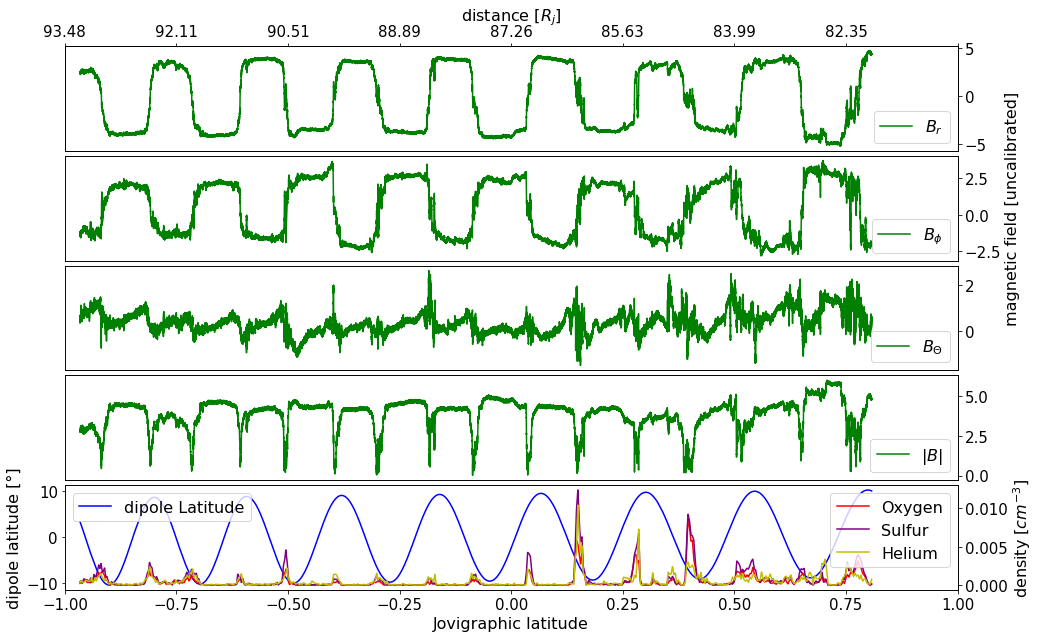

In [680]:
%matplotlib inline
fig,ax1 = plt.subplots(5,1,figsize=(16,10))
plt.subplots_adjust(hspace=0.05)

#B-feld:

### B_r:
ax1[0].plot(np.array(B[5]), B[6], '-w')
#ax1[0].set_xlabel('Jovigraphic latitude',fontsize=16)
ax1[0].set_xlim([-1,1])
#ax1[0].set_ylabel('dipole latitude [°]', fontsize=16)
ax1[0].tick_params(labelsize=15)
#ax1[0].legend(['dipole Latitude'],fontsize=16, loc = [0.79,0.14])
#ax1.tick_params(labelsize=15)
ax1[0].xaxis.set_visible(False)
ax1[0].yaxis.set_visible(False)
ax1[0].grid()

ax2 = ax1[0].twinx()
ax2.plot(np.array(B[5]), B_comp[-1],'-g')
#ax2.set_ylabel('magnetic field [uncalibrated]', fontsize=16)
ax2.legend(['$B_{r}$'],fontsize=16, loc = 4)
ax2.tick_params(labelsize=15)

# Set scond x-axis
ax3 = ax1[0].twiny()
ax3.set_xticklabels([93.48,92.11,90.51,88.89,87.26,85.63,83.99,82.35], fontsize=15)
ax3.set_xlabel('distance [$R_j$]', fontsize=16)
ax3.set_xlim(ax1[0].get_xlim())


###B_phi:
ax1[1].plot(np.array(B[5]), B[6], '-w')
#ax1[1].set_xlabel('Jovigraphic latitude',fontsize=16)
ax1[1].set_xlim([-1,1])
#ax1[1].set_ylabel('dipole latitude [°]', fontsize=16)
ax1[1].tick_params(labelsize=15)
#ax1[1].legend(['dipole Latitude'],fontsize=16, loc = [0.79,0.14])
#ax1.tick_params(labelsize=15)
ax1[1].xaxis.set_visible(False)
ax1[1].yaxis.set_visible(False)

ax2 = ax1[1].twinx()
ax2.plot(np.array(B[5]), B_comp[-2],'-g')
ax2.set_ylabel('magnetic field [uncalibrated]', fontsize=16)
ax2.legend(['$B_{\phi}$'],fontsize=16, loc = 4)
ax2.tick_params(labelsize=15)


##B_theta:
ax1[2].plot(np.array(B[5]), B[6], '-w')
#ax1[2].set_xlabel('Jovigraphic latitude',fontsize=16)
ax1[2].set_xlim([-1,1])
ax1[2].set_ylabel('dipole latitude [°]', fontsize=16)
ax1[2].tick_params(labelsize=15)
#ax1[2].legend(['dipole Latitude'],fontsize=16, loc = [0.79,0.14])
#ax1.tick_params(labelsize=15)
ax1[2].xaxis.set_visible(False)
ax1[2].yaxis.set_visible(False)

ax2 = ax1[2].twinx()
ax2.plot(np.array(B[5]), B_comp[-3],'-g')
#ax2.set_ylabel('magnetic field [uncalibrated]', fontsize=16)
ax2.legend(['$B_{\Theta}$'],fontsize=16, loc = 4)
ax2.tick_params(labelsize=15)


###B_tot:
ax1[3].plot(np.array(B[5]), B[6], '-w')
#ax1[3].set_xlabel('Jovigraphic latitude',fontsize=16)
ax1[3].set_xlim([-1,1])
#ax1[3].set_ylabel('dipole latitude [°]', fontsize=16)
ax1[3].tick_params(labelsize=15)
#ax1[3].legend(['dipole Latitude'],fontsize=16, loc = [0.79,0.14])
#ax1.tick_params(labelsize=15)
ax1[3].xaxis.set_visible(False)
ax1[3].yaxis.set_visible(False)
#ax1[3].grid()

ax2 = ax1[3].twinx()
ax2.plot(np.array(B[5]), B[-1],'-g')
#ax2.set_ylabel('magnetic field [uncalibrated]', fontsize=16)
ax2.legend(['$|B|$'],fontsize=16, loc = 4)
ax2.tick_params(labelsize=15)


#density:

ax1[4].plot(np.array(B[5]), B[6], '-b')
ax1[4].set_xlabel('Jovigraphic latitude',fontsize=16)
ax1[4].set_xlim([-1,1])
ax1[4].set_ylabel('dipole latitude [°]', fontsize=16)
ax1[4].tick_params(labelsize=15)
ax1[4].legend(['dipole Latitude'],fontsize=16, loc = 2)
ax1[4].tick_params(labelsize=15)
#ax1[4].grid()

ax2 = ax1[4].twinx()
ax2.plot(np.array(B[5]), n_interp[0], '-r', np.array(B[5]), n_interp[1], 'purple', 
         np.array(B[5]), n_interp[2], '-y')
ax2.set_ylabel('density [$cm^{-3}$]', fontsize=16)
ax2.legend(['Oxygen', 'Sulfur', 'Helium'],fontsize=16, loc = 1)
ax2.tick_params(labelsize=15)
#ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#fig.savefig('Orbit04_maglat_B_B_comp_dens.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


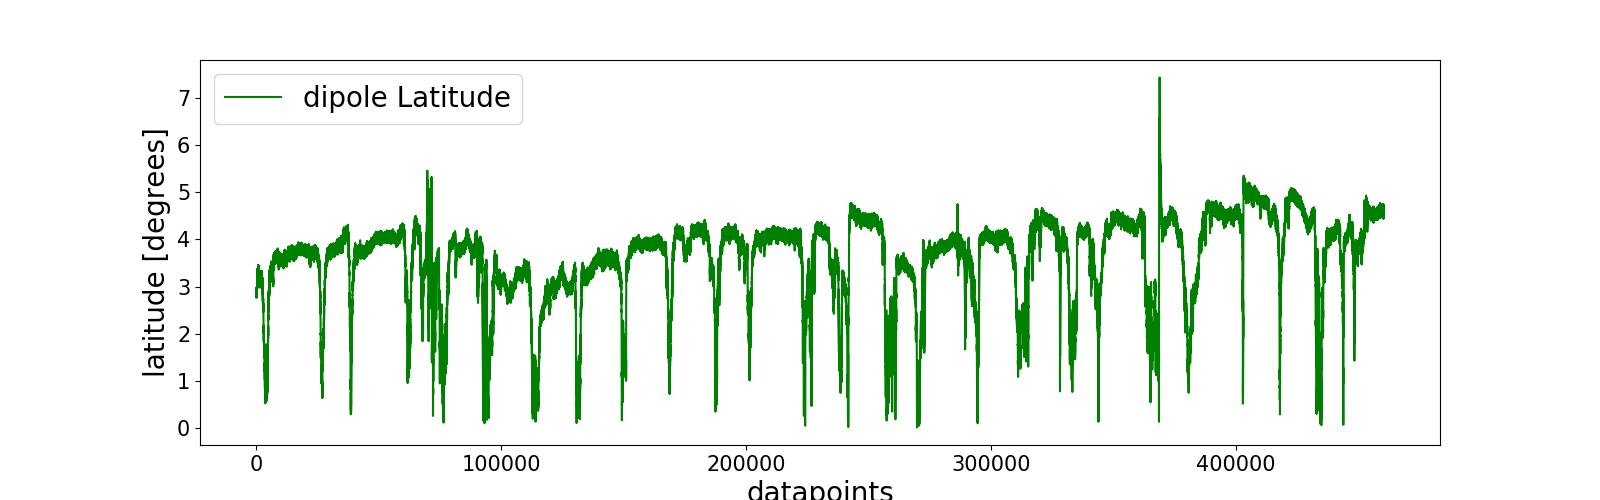

In [23]:
%matplotlib notebook
fig,ax = plt.subplots(figsize=(16,5))

ax.plot(B[-1],'-g')
ax.set_xlabel('datapoints',fontsize=20)
ax.set_ylabel('latitude [degrees]', fontsize=20)
#ax.set_title('Jupiter`s dipole- and measured magnetic field')
ax.tick_params(labelsize=15)
ax.legend(['dipole Latitude', 'measured $|B_{tot}|$'],fontsize=20, loc = 0)
#fig.savefig('maglat_B_wide_orbit10.png',bbox_inches='tight')

In [56]:
n_arr = [[]]*n_spec
temp = []
for i,spec in enumerate(n):
    for val in spec:
        temp.append(val[0])
    n_arr[i] = temp
    temp = []

In [57]:
n_interp = [[]]*n_spec
for i,specarr in enumerate(n_arr):
    n_interp[i] = enlargeVector(specarr,len(B[8]))

In [58]:
x_PA = []
I_PA_nofill = [[]]*n_spec

for spec,specArr in enumerate(I_PA):
    for PAval in specArr[1]:
        x_PA.append([x for x in PAval if x != -1.0E38])
    I_PA_nofill[spec] = x_PA
    x_PA = []
           
PA_full = [[]]*n_spec
PA_temp = []
            
for spec,specArr in enumerate(I_PA_nofill):
    for PA,PAarr in enumerate(specArr):
        if len(PAarr) == 30:
            PA_temp.append(PAarr)
    PA_full[spec] = PA_temp
    PA_temp = []

In [59]:
print(len(PA_full[1]),'/',len(I_PA[1][1]), ' Intensity-Daten sind voll PA-abgedeckt.')

0 / 1000  Intensity-Daten sind voll PA-abgedeckt.


## Convolution method:

In [178]:
#num.insert(0,0) #use if num[0] is not 0, for correct calculation of num0

[0,
 11309,
 29502,
 47047,
 65231,
 83063,
 100963,
 118790,
 136694,
 154518,
 172426,
 190246,
 208156,
 225976,
 243593,
 261703,
 279331]

In [35]:
num0 = [] #alle maglat Indices die am nähesten an den Nullstellen sind. --> Für passage_inds zwischen den Nullstellen von maglat
for i in range(0,len(num)-1,1):
    a = [i for i in B[6][num[i]:(num[i+1]+1)]]
    numtemp = min(range(len(a)), key=lambda j: abs(a[j]-0))
    num0.append(num[i]+numtemp)
num0.append(len(B[6])-1)

In [36]:
# definiere Passagen innerhalb derer convolution angewandt wird:
passages = [[]]*(len(num0)-1)
passages_temp = []
for i,arr in enumerate(passages):
    for ind in range(num0[i],num0[i+1]+1,1): # hier num0 für Nullstellen von maglat 
                                             # oder num für Extrema wählen! Beachte: Bei num fehlt erster Index = 0!!
        passages_temp.append(ind)
    passages[i] = passages_temp
    passages_temp = []

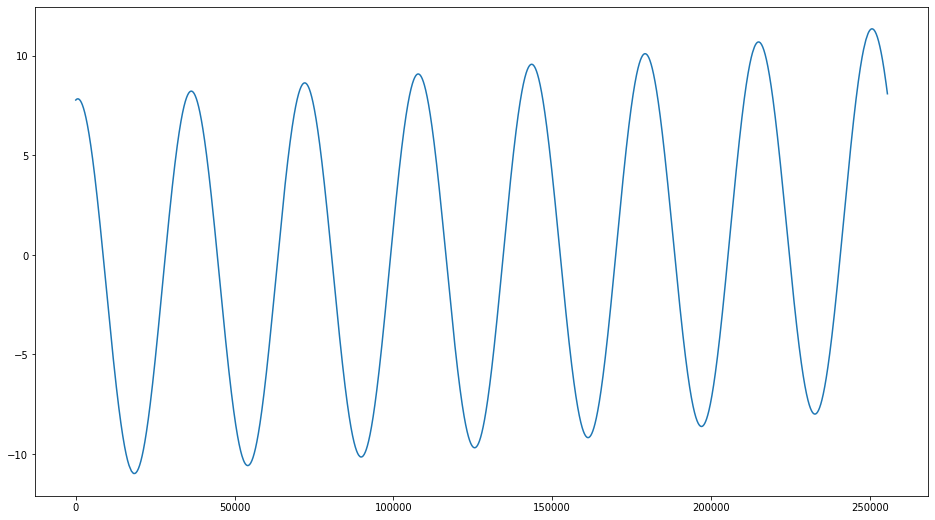

In [37]:
%matplotlib inline

fig,ax = plt.subplots(figsize = (16,9))
ax.plot(B[6])

In [38]:
# find changepoints for each passage using convolution:
n_pass = len(passages)
passage_inds = [[]]*n_pass

for i,val in enumerate(passages):
    myarray = np.asarray(B[8][val[0]:val[-1]])
    myarray_min_mean = myarray - np.average(myarray)
    step = np.hstack((np.ones(len(myarray_min_mean)), -1*np.ones(len(myarray_min_mean))))
    myarray_step = np.convolve(myarray_min_mean, step, mode='valid')
    
    # get the peak of the convolution, its index
    step_indx_hi = np.argmax(myarray_step)  # yes, cleaner than np.where(dary_step == dary_step.max())[0][0]
    step_indx_lo = np.argmin(myarray_step)
    
    passage_inds[i] = [myarray, myarray_min_mean, step, myarray_step, val[0]+step_indx_hi, val[0]+step_indx_lo]

In [39]:
passages[0][0]

28216

In [40]:
passage_inds[0][0]

array([ 9.54005,  9.55774,  9.58843, ..., 10.3815 , 10.3778 , 10.3844 ])

Text(0.5, 1.0, 'Convolution method')

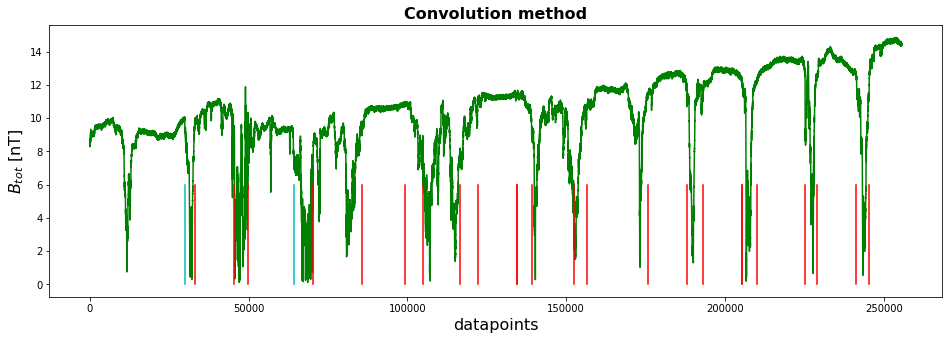

In [41]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(16,5))

ax.plot(B[-1], 'g')
for i,arr in enumerate(passage_inds):
    if i == 0 or i == 14:
        ax.plot([arr[4], arr[4]], [0, 6], 'r')
        ax.plot([arr[5], arr[5]], [0, 6], 'c')
    elif i == 2:
        ax.plot([arr[4], arr[4]], [0, 6], 'r')
        ax.plot([arr[5], arr[5]], [0, 6], 'c')
    else:
        ax.plot([arr[4], arr[4]], [0, 6], 'r')
        ax.plot([arr[5], arr[5]], [0, 6], 'r')
ax.set_xlabel('datapoints', fontsize = 16)
ax.set_ylabel('$B_{tot}$ [nT]', fontsize = 16)
ax.set_title('Convolution method', fontsize = 16, fontweight="bold")
#fig.savefig('Orbit04_conv_Nst.pdf',bbox_inches='tight')

In [42]:
#test:
myarray = np.asarray(B[8][passages[selec][0]:passages[selec][-1]])
myarray_min_mean = myarray-np.average(myarray)
step = np.hstack((np.ones(len(myarray_min_mean)), -1*np.ones(len(myarray_min_mean))))
myarray_step = np.convolve(myarray_min_mean, step, mode='valid')

# get the peak of the convolution, its index
step_indx_hi = np.argmax(myarray_step)
step_indx_lo = np.argmin(myarray_step)
#[myarray, myarray_min_mean, step, myarray_step, val[0]+step_indx_hi, val[0]+step_indx_lo]

NameError: name 'selec' is not defined

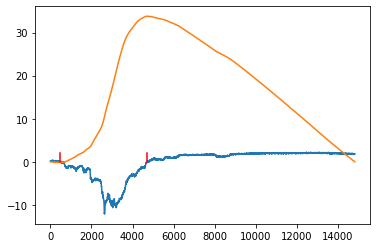

In [43]:
# test:
selec = 0
plt.plot(myarray_min_mean)
plt.plot(myarray_step/1000)
plt.plot((step_indx_hi, step_indx_hi), (2, 0), 'r')
plt.plot((step_indx_lo, step_indx_lo), (2, 0), 'r')

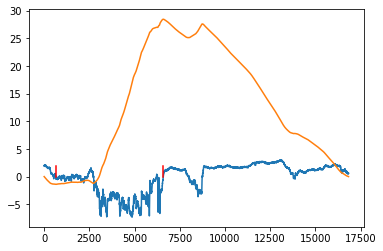

In [44]:
# code in short:
selec = 2
plt.plot(passage_inds[selec][1])
plt.plot(passage_inds[selec][3]/1000)
plt.plot((passage_inds[selec][4]-passages[selec][0], passage_inds[selec][4]-passages[selec][0]), (2, 0), 'r')
plt.plot((passage_inds[selec][5]-passages[selec][0], passage_inds[selec][5]-passages[selec][0]), (2, 0), 'r')

NameError: name 'Bins_perc_edgeabo' is not defined

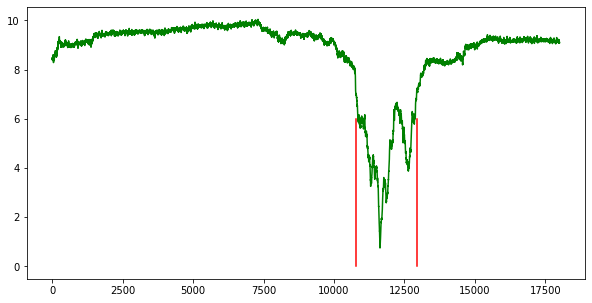

In [53]:
fig,ax = plt.subplots(1,1,figsize = (10,5))


ax.plot(B[-1][0:18000], '-g')
ax.plot([ipt[0], ipt[0]],[0, 6], 'r')
ax.plot([ipt[1], ipt[1]],[0, 6], 'r')
ax.plot([Bins_perc_edgeabo[3][0][-1], Bins_perc_edgeabo[3][0][-1]],[0, 6], 'orange')
ax.plot([Bins_perc_edgebel[3][0][0], Bins_perc_edgebel[3][0][0]],[0, 6], 'c')
ax.fill_between([ipt[0], Bins_perc_edgeabo[3][0][-1]], 0, 6, facecolor='#ffe4b5', alpha=0.5)
ax.fill_between([ipt[1], Bins_perc_edgebel[3][0][0]], 0, 6, facecolor='#b0e0e6', alpha=0.5)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.text(0.3, 0.8, 'above', ha='center', va='center', fontsize = 16)
fig.text(0.7, 0.8, 'below', ha='center', va='center', fontsize = 16)
fig.text(0.512, 0.8, 'inside', ha='center', va='center', fontsize = 16)
fig.text(0.4611, 0.68, 'edge (N)', ha='center', va='center', rotation = 270, fontsize = 16)
fig.text(0.5631, 0.68, 'edge (S)', ha='center', va='center', rotation = 270, fontsize = 16)

#fig.savefig('edge_fig.png',bbox_inches='tight')

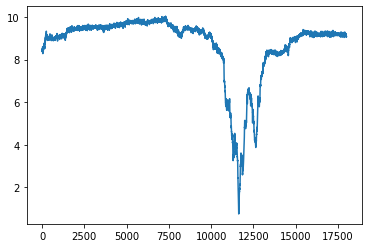

In [46]:
plt.plot(B[-1][0:18000])

In [47]:
Bins_perc_edgebel[3][0][0]

NameError: name 'Bins_perc_edgebel' is not defined

In [242]:
B_edgeabo[3][500]

7869

In [54]:
ipt[0]

10769

## Mean Variation method

In [49]:
# calculate number of B_above & B_below:

maglatExtr = argrelextrema(np.array(B[6]), np.greater_equal)
num = []
i_now = 0
for i,magval in enumerate(maglatExtr[0]):
    if abs(magval - i_now) > 1000:
        num.append(magval)
        i_now = magval
    else:
        continue

n_pass = len(num)

# Anzahl der rel. Extrema plus der erste Wert (index 0) --> +1
num_below = int(np.floor((len(num)+1)/2))
num_above = int(num_below +1)

# --> take vector 'num' as passages to to find changepoints in mean with matlab function findchangepts

In [50]:
print(num)
#np.savetxt('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/%s/num.out'%answer_Orbit[0:7], num, delimiter=',')

[18109, 36340, 53834, 72073, 89558, 107804, 125573, 143535, 161293, 178978, 197020, 214712, 232737, 250433]


In [52]:
# changepoints by variation in mean (matlab):

iptload = open('C:/Users/michi/Documents/GitHub/Jupiters_energetic_particles/%s/ipt.txt'%answer_Orbit[0:7],'r')
ipt = []
for line in iptload:
    line = line.strip()
    columns = line.split()
    for j in columns[0:]:
        ipt.append(float(j))
for i,val in enumerate(ipt):
    ipt[i] = int(val)

ipt_lo = [val for i,val in enumerate(ipt[0:len(ipt):2])]
ipt_hi = [val for i,val in enumerate(ipt[1:len(ipt):2])]

### Plots

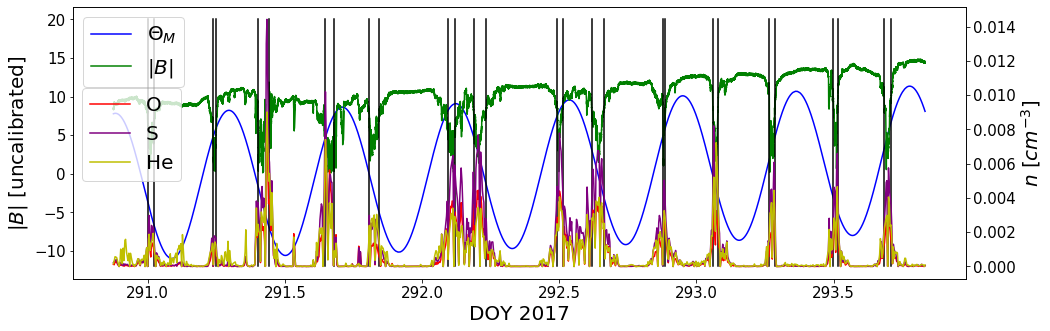

In [61]:
%matplotlib inline
fig,ax1 = plt.subplots(figsize=(16,5))

ax1 = plt.subplot(1,1,1)
ax1.plot(day_B_vec, B[6], '-b', day_B_vec, B[8], '-g')
ax1.legend(['$\Theta_M$','$|B|$'],fontsize=20, loc = 0)
ax1.tick_params(labelsize=15)
ax1.set_ylabel('$|B|$ [uncalibrated]', fontsize=20)
ax1.set_xlabel('DOY 2017',fontsize=20)


ax2 = ax1.twinx()
ax2.plot(day_B_vec, n_interp[0],'-r', day_B_vec, n_interp[1],'purple', day_B_vec, n_interp[2],'-y')
ax2.set_xlabel('days of the year 2017',fontsize=20)
ax2.set_ylabel('$n$ [$cm^{-3}$]', fontsize=20)
ax2.legend(['O', 'S' ,'He'],fontsize=20, loc=[0.01,0.36])
ax2.tick_params(labelsize=15)

#ax3 = ax1.twinx()
for val in ipt:
    ax1.plot((day_B_vec[val],day_B_vec[val]),(-12, 20),'k')

#fig.savefig('maglat_B_dens_ipt_orbit04.pdf',bbox_inches='tight')

NameError: name 'Bins_perc' is not defined

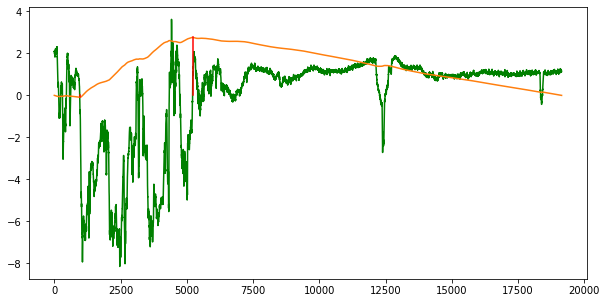

In [62]:
%matplotlib inline
# code in short:
#plt.plot(myarray_mean)
#pl.plot(myarray_step/1000)
#plt.plot((step_indx_low, step_indx_low), (myarray_step[step_indx_low]/1000, 0), 'r')
#plt.plot((step_indx, step_indx), (myarray_step[step_indx]/1000, 0), 'r')

fig,ax = plt.subplots(figsize=(10,5))
select_passage = 1
select_percentageDrop = 0 #index in vector perc

xa = np.linspace(0, 11, 100)

# B-feld - mean
ax.plot(passage_inds[select_passage][1],'g')

# convolution-signal
ax.plot(passage_inds[select_passage][3]/10000, 'C1')

# Steps
#high
ax.plot((passage_inds[select_passage][-1]-passages[select_passage][0], passage_inds[select_passage][-1]-passages[select_passage][0]),
        (passage_inds[select_passage][3][passage_inds[select_passage][-1]-passages[select_passage][0]]/10000, 0), 'r')
#low
ax.plot((passage_inds[select_passage][-2]-passages[select_passage][0], passage_inds[select_passage][-2]-passages[select_passage][0]),
        (passage_inds[select_passage][3][passage_inds[select_passage][-2]-passages[select_passage][0]]/10000, 0), 'r')

# Steps(percentage)
#high
ax.plot((Bins_perc[select_percentageDrop][select_passage][-1]-passages[select_passage][0], Bins_perc[select_percentageDrop][select_passage][-1]-passages[select_passage][0]),
        (passage_inds[select_passage][1][Bins_perc[3][select_passage][-1]-passages[select_passage][0]], 0), 'c')
#low
ax.plot((Bins_perc[select_percentageDrop][select_passage][0]-passages[select_passage][0], Bins_perc[select_percentageDrop][select_passage][0]-passages[select_passage][0]),
        (passage_inds[select_passage][1][Bins_perc[3][select_passage][0]-passages[select_passage][0]], 0), 'c')

#matlab results:
#low
ax.plot((ipt_lo[select_passage]-passages[select_passage][0],ipt_lo[select_passage]-passages[select_passage][0]), 
        (passage_inds[select_passage][1][Bins_perc[0][select_passage][0]-passages[select_passage][0]], 0),'b')
#high
ax.plot((ipt_hi[select_passage]-passages[select_passage][0],ipt_hi[select_passage]-passages[select_passage][0]), 
        (passage_inds[select_passage][1][Bins_perc[0][select_passage][0]-passages[select_passage][0]], 0),'b')

ax.set_title(select_passage)
ax.axhline(linewidth=1.5, color='m')
#fig.savefig('B_orbit6_conv_extrema_2.png',bbox_inches='tight')

In [407]:
ipt =  [10991,
       26969,
       29092,
       42657,
       45160,
       62025,
       63710,
       79312,
       80930,
       97893,
       99668,
      112964,
      116193,
      132288,
      135131,
      147916,
      150372,
      167382,
      169194,
      184000,
      187372,
      204177,
      205879,
      220513,
      224371,
      237947,
      243356,
      258037,
      259486,
      272723,
      277705]

Text(0.5, 1.0, 'residual minimization method')

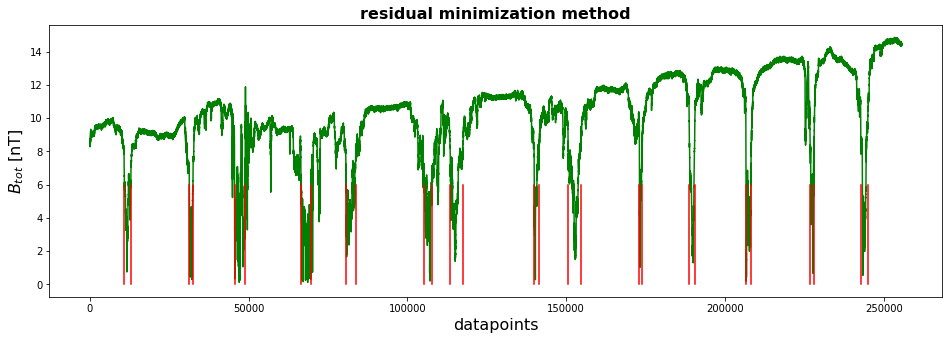

In [63]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(16,5))
ax.plot(B[-1],'g')
#matlab changepoints
for val in ipt:
    ax.plot((val,val),(0, 6),'r')
#convolution changepoints
#for valarr in passage_inds:
#    ax.plot((valarr[-1], valarr[-1]),(-10,0),'r')
#    ax.plot((valarr[-2], valarr[-2]),(-10,0),'r')
ax.set_xlabel('datapoints', fontsize = 16)
ax.set_ylabel('$B_{tot}$ [nT]', fontsize = 16)
ax.set_title('residual minimization method', fontsize = 16, fontweight="bold")
#fig.savefig('Orbit04_findchpts_thres.pdf',bbox_inches='tight')

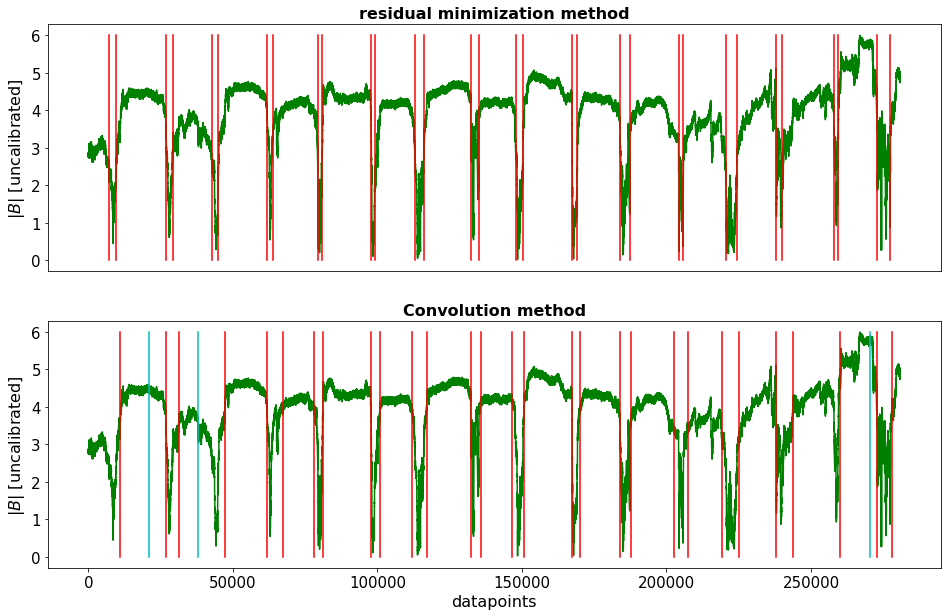

In [188]:
fig,ax = plt.subplots(2,1,figsize=(16,10))

#residual
ax[0].plot(B[-1],'g')
#matlab changepoints
for val in ipt:
    ax[0].plot((val,val),(0, 6),'r')
#convolution changepoints
#for valarr in passage_inds:
#    ax.plot((valarr[-1], valarr[-1]),(-10,0),'r')
#    ax.plot((valarr[-2], valarr[-2]),(-10,0),'r')
#ax[0].set_xlabel('datapoints', fontsize = 16)
ax[0].set_ylabel('$|B|$ [uncalibrated]', fontsize = 16)
ax[0].set_title('residual minimization method', fontsize = 16, fontweight="bold")
ax[0].xaxis.set_visible(False)
ax[0].tick_params(labelsize=15)

#convolution
ax[1].plot(B[-1], 'g')
for i,arr in enumerate(passage_inds):
    if i == 0 or i == 14:
        ax[1].plot([arr[4], arr[4]], [0, 6], 'r')
        ax[1].plot([arr[5], arr[5]], [0, 6], 'c')
    elif i == 2:
        ax[1].plot([arr[4], arr[4]], [0, 6], 'r')
        ax[1].plot([arr[5], arr[5]], [0, 6], 'c')
    else:
        ax[1].plot([arr[4], arr[4]], [0, 6], 'r')
        ax[1].plot([arr[5], arr[5]], [0, 6], 'r')
ax[1].tick_params(labelsize=15)
ax[1].set_xlabel('datapoints', fontsize = 16)
ax[1].set_ylabel('$|B|$ [uncalibrated]', fontsize = 16)
ax[1].set_title('Convolution method', fontsize = 16, fontweight="bold")
#fig.savefig('Orbit04_method_comp.pdf',bbox_inches='tight')

## Determine B_inside/B_above/B_below

In [64]:
# select percentage(s) by which current sheet thickness will be reduced on each side of the drop:

perc = [0,5,10,20] #in percent
n_perc = len(perc)

In [65]:
# get all 'inside-indices':

Bins_perc_temp = [[[]]*n_pass]*n_perc
Bins_perc_temp_edgeabo = [[[]]*n_pass]*n_perc
Bins_perc_temp_edgebel = [[[]]*n_pass]*n_perc
Bin = [[]]*n_pass
Bins_perc = [] # percentage-Variationen x current-sheet Durchgänge
Bins_perc_edgeabo = []# transition zone from above and inside the current sheet
Bins_perc_edgebel = [] # transition zone from below and inside the current sheet

#mean Variation:
for i in range(0,len(ipt_lo),1):
    Bin[i] = [k for k in range(ipt_lo[i],ipt_hi[i]+1,1)]
    
#convolution:
#for i,val in enumerate(passage_inds):
#    Bin[i] = [k for k in range(val[-1],val[-2]+1,1)]

for j,percentage in enumerate(Bins_perc_temp):
    for i,crossing in enumerate(percentage):
        perc_val = round(len(Bin[i])*(perc[j]/100))
        Bins_perc_temp[j][i] = (Bin[i][perc_val:len(Bin[i])-perc_val])
        if i%2 == 0:
            Bins_perc_temp_edgeabo[j][i] = Bin[i][0:perc_val]
            Bins_perc_temp_edgebel[j][i] = Bin[i][len(Bin[i])-perc_val:len(Bin[i])]
        if i%2 != 0:
            Bins_perc_temp_edgebel[j][i] = Bin[i][0:perc_val]
            Bins_perc_temp_edgeabo[j][i] = Bin[i][len(Bin[i])-perc_val:len(Bin[i])]
        Bins_perc.append(Bins_perc_temp[j][i])
        Bins_perc_edgebel.append(Bins_perc_temp_edgebel[j][i])
        Bins_perc_edgeabo.append(Bins_perc_temp_edgeabo[j][i])
Bins_perc = np.reshape(Bins_perc,(n_perc,n_pass))
Bins_perc_edgeabo = np.reshape(Bins_perc_edgeabo,(n_perc,n_pass))
Bins_perc_edgebel = np.reshape(Bins_perc_edgebel,(n_perc,n_pass))

B_inside = []
for arr in Bins_perc:
    B_inside.append(np.concatenate(arr, axis=None))
    
B_edgeabo = []
for arr in Bins_perc_edgeabo:
    B_edgeabo.append(np.concatenate(arr, axis=None))
    
B_edgebel = []
for arr in Bins_perc_edgebel:
    B_edgebel.append(np.concatenate(arr, axis=None))
    
B_edge = []
for i in range(0,n_perc,1):
    B_edge.append(np.sort(list(B_edgeabo[i]) + list(B_edgebel[i])))

In [66]:
# calculate indices of above and below current sheet for all percentage variations and current sheet crossings 
# and concatenate to B_above & B_below:

#Above:

B_abs_temp = []
B_abs = [[[]]*(num_above-2) for i in range(n_perc)]
B_abs1 = [[]]*n_perc
B_abs2 = [[]]*n_perc
B_above = [[]]*n_perc

# calculate before 1st and after last crossing:
for i,val in enumerate(perc):
    B_abs1[i] = [k for k in range(0,Bins_perc[i][0][0],1)]
    B_abs2[i] = [k for k in range(Bins_perc[i][len(num)-1][-1]+1,len(B[-1]),1)]

# calculate above-indices between all other crossings:    
for i,val in enumerate(perc):    
    for j,arr in enumerate(B_abs[i]):
        for k in range(Bins_perc[i][j*2+1][-1]+1,Bins_perc[i][j*2+2][0],1):
            B_abs_temp.append(k)
        B_abs[i][j] = B_abs_temp
        B_abs_temp = []

#concatenate to 1 vector
#all indices above current sheet for i = percentage variations
for i,val in enumerate(perc):    
    B_above[i] = B_abs1[i] + list(np.concatenate(B_abs[i])) + B_abs2[i] 
    
    
#Below:

B_bes_temp = []
B_bes = [[[]]*(num_below) for i in range(n_perc)]
B_below = [[]]*n_perc

# calculate below-indices inbetween all crossings:    
for i,val in enumerate(perc):    
    for j,arr in enumerate(B_bes[i]):
        for k in range(Bins_perc[i][j*2][-1]+1,Bins_perc[i][j*2+1][0],1):
            B_bes_temp.append(k)
        B_bes[i][j] = B_bes_temp
        B_bes_temp = []

#concatenate to 1 vector
for i,val in enumerate(perc):
    B_below[i] = list(np.concatenate(B_bes[i]))

#concatenate regions to 1 vector
Bclass = [B_inside, B_above, B_below, B_edgeabo, B_edgebel, B_edge]
Nclass = len(Bclass)

In [67]:
N_in = [[]]*n_perc
N_ab = [[]]*n_perc
N_be = [[]]*n_perc
N_edgeabo = [[]]*n_perc
N_edgebel = [[]]*n_perc
N_edge = [[]]*n_perc

for i in range(n_perc):
    N_in[i] = len(B_inside[i])
    N_ab[i] = len(B_above[i])
    N_be[i] = len(B_below[i])
    N_edgeabo[i] = len(B_edgeabo[i])
    N_edgebel[i] = len(B_edgebel[i])
    N_edge[i] = len(B_edge[i])

print('B_inside: ',round(N_in[0]/len(B[8]),4)*100,'%')
print('B_above: ',round(N_ab[0]/len(B[8]),4)*100,'%')
print('B_below: ',round(N_be[0]/len(B[8]),4)*100,'%')
print('B_edge_abo: ',round(N_edgeabo[3]/len(B[8]),4)*100,'%')
print('B_edge_bel: ',round(N_edgebel[3]/len(B[8]),4)*100,'%')

B_inside:  12.72 %
B_above:  36.78 %
B_below:  50.5 %
B_edge_abo:  2.54 %
B_edge_bel:  2.54 %


## check Compton-Getting effect

In [68]:
# 1. particle velocity:
Rj = 71492e3 #m
c = 299792458*3600/Rj #Rj/h
m = np.array([m_O, m_S, m_He, m_H])/(1.782661e-36*1e3) #KeV/c^2
v_spec_temp = []
v_spec = [[]]*n_spec #Rj/h
v_spec_mean = [] #Rj/h
for spec in range(0,n_spec,1):
    for channel in I_E[spec][0]:
        v_spec_temp.append(np.round(np.sqrt(2*channel/m[spec])*c,1))
    v_spec[spec] = v_spec_temp
    v_spec_temp = []
    # gemittelt über alle Energy channels:
    v_spec_mean.append(np.round(np.sqrt(2*np.mean(I_E[spec][0])/m[spec])*c,1))
v_spec

[[120.3, 150.6, 170.4, 226.6, 325.6, 470.9],
 [96.5, 115.0, 163.1, 235.9, 335.7],
 [105.9, 173.5, 322.4],
 [127.6, 135.0, 163.5, 217.3, 308.5, 441.8, 662.5]]

In [69]:
np.array(v_spec[3])*Rj/1000/3600

array([ 2533.99422222,  2680.95      ,  3246.92833333,  4315.33655556,
        6126.46722222,  8773.65711111, 13156.51388889])

In [70]:
v_spec_mean

[272.4, 208.5, 220.0, 346.0]

In [71]:
# 2. bulk flow tangential velocity:
Omega = 2*np.pi/10 #rad/h
v_b = Omega*np.mean(B[-2]) #Rj/h
v_b
# look at Hill 2001, Fig2 for modeled velocities after breakdown of corotation, 
# e.g. 1/4th of corot. vel. for 3*30Rj distance

37.255728408258804

In [72]:
rad_dis = [35*0.7, 40*0.6, 50*0.4, 70*0.25, 90*0.2, 100*0.1]
v_c = Omega*np.array(rad_dis)
v_c

array([15.393804  , 15.07964474, 12.56637061, 10.99557429, 11.30973355,
        6.28318531])

In [73]:
# 3. spacecraft velocity:
#################################
#Gesamtzeit der Zeitreihe:
days_diff = B[1][-1]-B[1][0]
hours_diff = B[2][-1]-B[2][0]
mins_diff = B[3][-1]-B[3][0]
secs_diff = B[4][-1]-B[4][0]
last_time = B[1][-1]+B[2][-1]/24+B[3][-1]/(24*60)+B[4][-1]/(24*60*60)
first_time = B[1][0]+B[2][0]/24+B[3][0]/(24*60)+B[4][0]/(24*60*60)
time_dataset = last_time-first_time #days
mean_time_res_mins = time_dataset*24*60/len(B[-1])
mean_time_res_mins #[minuten pro datenpunkt]
##################################
x = []
y = []
dist_vec = []
for i in range(0,len(B[-2]),1):
    x.append(B[-2][i]*np.cos(B[-4][i]*np.pi/180))
    y.append(B[-2][i]*np.sin(B[-4][i]*np.pi/180))
    if i>0:
        dist_vec.append(np.sqrt((y[i]-y[i-1])**2 + (x[i]-x[i-1])**2))
dist = sum(dist_vec)
v_sc = dist/(time_dataset*24) #Rj/h

In [74]:
time_dataset

2.958320937499991

In [75]:
v_sc_kms = v_sc*Rj/1000/3600
print(v_sc,'Rj/h',v_sc_kms,'km/s')

0.2814533079401776 Rj/h 5.589349969794216 km/s


Text(0, 0.5, 'y [$R_J$]')

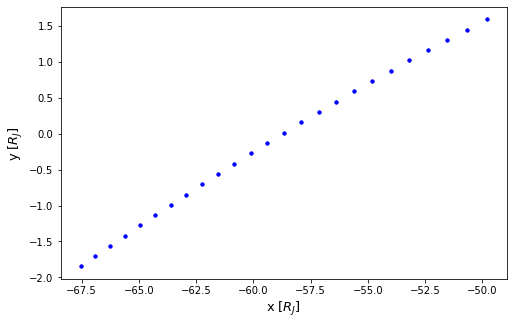

In [76]:
fig,ax = plt.subplots(figsize=(8,5))

for i in range(0,len(B[-2]),10000):
    if i>0:
        ax.plot([-x[i-1], -x[i]], [y[i-1], y[i]], 'b.-')
ax.set_xlabel('x [$R_J$]', fontsize = 13)
ax.set_ylabel('y [$R_J$]', fontsize = 13)

#fig.savefig('Orbit6_trajectory.pdf',bbox_inches='tight')

In [77]:
print('particle vel.: ','\nv_O: ',v_spec[0], '\nv_S: ',v_spec[1], '\nv_He: ',v_spec[2], '\nv_H: ',v_spec[3],
      '\nbulk flow vel.: <', v_b, '\nspacecraft vel.: ', v_sc)

particle vel.:  
v_O:  [120.3, 150.6, 170.4, 226.6, 325.6, 470.9] 
v_S:  [96.5, 115.0, 163.1, 235.9, 335.7] 
v_He:  [105.9, 173.5, 322.4] 
v_H:  [127.6, 135.0, 163.5, 217.3, 308.5, 441.8, 662.5] 
bulk flow vel.: < 37.255728408258804 
spacecraft vel.:  0.2814533079401776


## comparison of velocities:
### 1. particle velocity: $10^{2} - 10^{3}$ $Rj/h$
### 2. bulk flow velocity: $1 - 10^{2}$ $Rj/h$ (range: 1 to 100 Rj distance)
### 3. spacecraft velocity: $10^{-3} - 1$ $Rj/h$

# Calculation of Intensity average for inside, above/below (Quasi-Interpolation)

In [79]:
# get time vector in intensity matrix

time_vec = open('C:/Users/michi/Documents/GitHub/Jupiters_energetic_particles/%s.d2s'%fileIntPA_O, 'r')

for line in range(17):
    line = time_vec.readline()
    
# split columns, float-values, units
time_Int=[]
for line in time_vec:
    line = line.strip()
    columns = line.split()
    for i in columns[0:1]:
        time_Int.append(i)
time_vec.close()

In [80]:
# separate time vector in days, hours, minutes, seconds and find time in B-field vector closest 
# to each time of Intensity matrix

date_Int = [dt.datetime(int(i[4:8]),int(i[9:11]),int(i[12:14])) for i in time_Int]
day_Int = [int(i.strftime("%j")) for i in date_Int]
hourInt = [int(i[15:17]) for i in time_Int]
minInt = [int(i[18:20]) for i in time_Int]
secInt = [int(i[21:23]) for i in time_Int]
min_sec_vec_Int = np.transpose([minInt,secInt])
min_sec_Int = [float(f'{i[0]}.{i[1]}') for i in min_sec_vec_Int]
Int_time = np.transpose([day_Int,hourInt,min_sec_Int])

In [81]:
# allocate closest times of both arrays by hours, minutes and seconds
# the array 'seconds_allocate_Int_B' gives list of B-field-time Indices that are closest to each intensity-time value

seconds_allocate_Int_B = []
index = 0
for time in Int_time:
    index +=1
    print('{} %'.format(index/20),end='\r')
    dates = []
    dates.append([lines for lines,val in enumerate(B[1]) if val == time[0]])
    hours = []
    hours.append([lines for lines,val in enumerate(B[2][dates[0][0]:dates[0][-1]]) if val == time[1]])
    hours[0] = [x+dates[0][0] for x in hours[0]]
    seconds_allocate_Int_B.append(min(range(len(min_sec_B[hours[0][0]:hours[0][-1]])), 
                                      key=lambda i:abs(min_sec_B[hours[0][0]:hours[0][-1]][i]-time[2])))
    seconds_allocate_Int_B[-1] = seconds_allocate_Int_B[-1] + hours[0][0]

## Allocate B-field

#### Erklärung der Datenstruktur:
die Listen sind auf folgender Weise verschachtelt:<br>
Liste<font color=blue>[Region]</font><font color=red>[Verschiebungs-Prozentsatz für Ränder]</font><font color=orange>[Species]</font><font color=green>[EnergieKanal/PitchWinkel]</font><font color=black>[Vektor]</font><br>
Die Nummerierung ist:<br>
> -  <font color=blue>Region</font>: 0 = inside, 1 = above, 2 = below, 3 = Randregion_{above}, 4 = Randregion_{below}, 5 = Randregion_{gesamt}<br>
> -  <font color=red>[Verschiebungs-Prozentsatz für Ränder]</font>: Prozentsatz, um den die Zeit innerhalb der current sheet an beiden Rändern jeweils gekürzt wurde um die Randregionen genauer zu betrachten. Die Randregionen sind also 2*Prozentsatz*currentsheet_crossingtime breit<br>
> -  <font color=orange>[Species]</font>: 0 = Oxygen, 1 = Sulphur, 2 = Helium, 3 = Protons<br>
> -  <font color=green>[EnergieKanal/PitchWinkel]</font>: Energie je nach Species: Oxygen(0-5), Sulphur(0-4), Helium(0-2), Protons depending on dataset. PitchWinkel: 0-29<br>


In [82]:
# Get matrix of intensity indices that belong to the times where the spacecraft is inside/above/below the current sheet:

Int = [[[]]*n_perc]*Nclass

Int_class = [[]]*n_perc
Int_temp = []
for clas,Bclassif in enumerate(Bclass):
    print(clas)
    for ind,p in enumerate(Bclassif):
        index1 = 0
        for valB in p:
            index1 +=1
            print('{:1%}'.format(index1/N_in[ind]),end ='\r')
            for pos,val in enumerate(seconds_allocate_Int_B):
                if valB == val:
                    Int_temp.append(pos)
        Int_class[ind] = Int_temp
        Int_temp = []
    Int[clas] = Int_class
    Int_class = [[]]*n_perc

0
100.000000%
215.360952%
395.139459%
43.331624%
53.331624%


In [83]:
Int_E = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]
Int_PA = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_E = [[[]]*n_spec for i in range(n_perc)]
x_PA = [[[]]*n_spec for i in range(n_perc)]
x_E_temp = []
x_PA_temp = []

for clas,classif in enumerate(Int_E):
    for percind,percArr in enumerate(classif):
        for spec,specArr in enumerate(percArr):
            for j in Int[clas][percind]:
                x_E_temp.append(I_E[spec][1][j])
                x_PA_temp.append(I_PA[spec][1][j])
            x_E[percind][spec] = x_E_temp
            x_PA[percind][spec] = x_PA_temp
            x_E_temp = []
            x_PA_temp = []
    Int_E[clas] = x_E
    Int_PA[clas] = x_PA
    x_E = [[[]]*n_spec for i in range(n_perc)]
    x_PA = [[[]]*n_spec for i in range(n_perc)]

In [84]:
# transpose to delete fillValues:
for clas,classif in enumerate(Int_E):
    for p,percarr in enumerate(classif):
        for i,val in enumerate(percarr):
            Int_E[clas][p][i] = np.transpose(Int_E[clas][p][i])
            Int_PA[clas][p][i] = np.transpose(Int_PA[clas][p][i])

In [85]:
# delete fillValues
Int_E_nofill = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]
Int_PA_nofill = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_E = [[[]]*n_spec for i in range(n_perc)]
x_PA = [[[]]*n_spec for i in range(n_perc)]
x_E_temp = []
x_PA_temp = []

for clas,classif in enumerate(Int_E):
    for percind,percArr in enumerate(classif):
        for spec,specArr in enumerate(percArr):
            for Eval in specArr:
                x_E_temp.append([x for x in Eval if x != -1.0E38])
            x_E[percind][spec] = x_E_temp
            x_E_temp = []
    Int_E_nofill[clas] = x_E
    x_E = [[[]]*n_spec for i in range(n_perc)]


for clas,classif in enumerate(Int_PA):
    for percind,percArr in enumerate(classif):
        for spec,specArr in enumerate(percArr):
            for PAval in specArr:
                x_PA_temp.append([x for x in PAval if x != -1.0E38])
            x_PA[percind][spec] = x_PA_temp
            x_PA_temp = []
    Int_PA_nofill[clas] = x_PA
    x_PA = [[[]]*n_spec for i in range(n_perc)]

In [86]:
# take average

Int_E_mean = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]
Int_PA_mean = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_E = [[[]]*n_spec for i in range(n_perc)]
x_PA = [[[]]*n_spec for i in range(n_perc)]
x_E_temp = []
x_PA_temp = []

for clas,classif in enumerate(Int_E_nofill):
    for percind,percArr in enumerate(classif):
        for spec,val in enumerate(percArr):
            x_E_temp.append([np.mean(x) for x in val])
        x_E[percind] = x_E_temp
        x_E_temp = []
    Int_E_mean[clas] = x_E
    x_E = [[[]]*n_spec for i in range(n_perc)]
    
for clas,classif in enumerate(Int_PA_nofill):
    for percind,percArr in enumerate(classif):
        for spec,val in enumerate(percArr):
            x_PA_temp.append([np.mean(x) for x in val])
        x_PA[percind] = x_PA_temp
        x_PA_temp = []
    Int_PA_mean[clas] = x_PA
    x_PA = [[[]]*n_spec for i in range(n_perc)]

C:\Users\michi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\michi\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0, 'PA [°]')

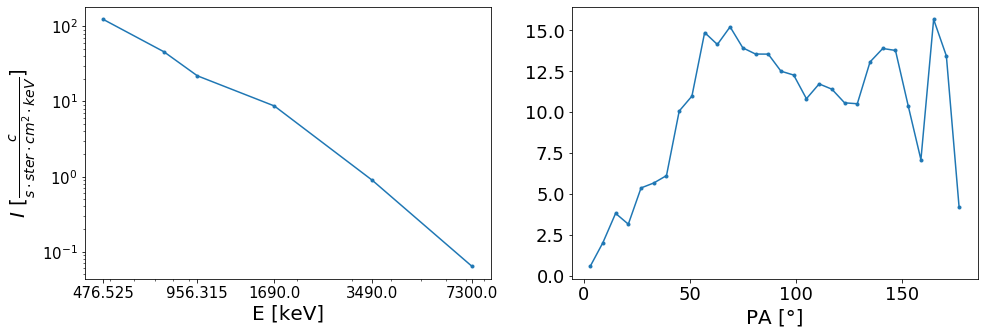

In [87]:
# Plot:
%matplotlib inline
fig,ax = plt.subplots(1,2,figsize=(16, 5))

ax[0].loglog(I_E[0][0], Int_E_mean[0][0][0], '.-')
ax[0].tick_params(labelsize=15)
ax[0].set_ylabel(r'$I$ [$\frac{c}{s \cdot ster \cdot cm^2 \cdot keV}$]', fontsize=20)
ax[0].set_xlabel('E [keV]',fontsize=20)
ax[0].set_xticks([I_E[0][0][0],I_E[0][0][2],I_E[0][0][3],I_E[0][0][4],I_E[0][0][5]])
ax[0].set_xticklabels([I_E[0][0][0],I_E[0][0][2],I_E[0][0][3],I_E[0][0][4],I_E[0][0][5]])

ax[1].plot(I_PA[0][0], Int_PA_mean[0][0][0], '.-')
ax[1].tick_params(labelsize=18)
#ax[1].set_ylabel(r'$I$ [$\frac{c}{s \cdot ster \cdot cm^2 \cdot keV}$]', fontsize=20)
ax[1].set_xlabel('PA [°]',fontsize=20)

#fig.savefig('Orbit4_IvsEvsPA.pdf',bbox_inches='tight')

## PA-Count for S/N

In [88]:
# load in counts for PA

yTag_PA_counts = 13

fileIntPA_O_counts = '%sPA_O_counts'%answer_Orbit
fileIntPA_S_counts = '%sPA_S_counts'%answer_Orbit
fileIntPA_He_counts = '%sPA_He_counts'%answer_Orbit
fileIntPA_H_counts = '%sPA_%s_H_counts'%(answer_Orbit, answer_Proton)

files_PA_counts = [[fileIntPA_O_counts, yTag_PA_counts, yTag_to_intens], [fileIntPA_S_counts, yTag_PA_counts, yTag_to_intens],
           [fileIntPA_He_counts, yTag_PA_counts, yTag_to_intens], [fileIntPA_H_counts, yTag_PA_counts, yTag_to_intens]]

counts_PA = [0,0,0,0]

for i,species in enumerate(files_PA_counts):
    counts_PA[i] = [load_yTag_data(species[0],species[1],species[2])][0]

In [89]:
PA_counts = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_PA = [[[]]*n_spec for i in range(n_perc)]
x_PA_temp = []
    
for clas,classif in enumerate(PA_counts):
    for percind,percArr in enumerate(classif):
        for spec,specArr in enumerate(percArr):
            for j in Int[clas][percind]:
                x_PA_temp.append(counts_PA[spec][1][j])
            x_PA[percind][spec] = x_PA_temp
            x_PA_temp = []
    PA_counts[clas] = x_PA
    x_PA = [[[]]*n_spec for i in range(n_perc)]

In [90]:
for clas,classif in enumerate(PA_counts):
    for p,percArr in enumerate(classif):
        for i,val in enumerate(percArr):
            PA_counts[clas][p][i] = np.transpose(PA_counts[clas][p][i])

In [91]:
PA_nofill_counts = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_PA = [[[]]*n_spec for i in range(n_perc)]
x_PA_temp = []
    
for clas,classif in enumerate(PA_counts):
    for percind,percArr in enumerate(classif):
        for spec,specArr in enumerate(percArr):
            for PAval in specArr:
                x_PA_temp.append([x for x in PAval if x != -1.0E38])
            x_PA[percind][spec] = x_PA_temp
            x_PA_temp = []
    PA_nofill_counts[clas] = x_PA
    x_PA = [[[]]*n_spec for i in range(n_perc)]

## standard deviation = \sqrt(sum(counts)) & variance = sum(counts) (Poisson statistic)

In [92]:
PA_sum_counts = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_PA = [[[]]*n_spec for i in range(n_perc)]
x_PA_temp = []
    
for clas,classif in enumerate(PA_nofill_counts):
    for percind,percArr in enumerate(classif):
        for spec,val in enumerate(percArr):
            x_PA_temp.append([np.sum(x) for x in val])
        x_PA[percind] = x_PA_temp
        x_PA_temp = []
    PA_sum_counts[clas] = x_PA
    x_PA = [[[]]*n_spec for i in range(n_perc)]

In [93]:
PA_sqrt_counts = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_PA = [[[]]*n_spec for i in range(n_perc)]
x_PA_temp = []
    
for clas,classif in enumerate(PA_sum_counts):
    for percind,percArr in enumerate(classif):
        for spec,val in enumerate(percArr):
            x_PA_temp.append([np.sqrt(x) for x in val])
        x_PA[percind] = x_PA_temp
        x_PA_temp = []
    PA_sqrt_counts[clas] = x_PA
    x_PA = [[[]]*n_spec for i in range(n_perc)]

## Rose criterion

In [94]:
PA_vec = np.arange(3,180,6)
Int_PA_mean_gr5 = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]
I_PA_gr5 = [[[[]]*n_spec for i in range(n_perc)] for i in range(Nclass)]

x_PA = [[[]]*n_spec for i in range(n_perc)]
i_PA = [[[]]*n_spec for i in range(n_perc)]
x_PA_temp = []
i_PA_temp = []
    
for clas,classif in enumerate(PA_sqrt_counts):
    for percind,percArr in enumerate(classif):
        for spec,specArr in enumerate(percArr):
            for i,PAval in enumerate(specArr):
                if PAval >= 5:
                    x_PA_temp.append(Int_PA_mean[clas][percind][spec][i])
                    i_PA_temp.append(PA_vec[i])
            x_PA[percind][spec] = x_PA_temp
            i_PA[percind][spec] = i_PA_temp
            x_PA_temp = []
            i_PA_temp = []
    Int_PA_mean_gr5[clas] = x_PA
    I_PA_gr5[clas] = i_PA
    x_PA = [[[]]*n_spec for i in range(n_perc)]
    i_PA = [[[]]*n_spec for i in range(n_perc)]

# Plotting

NameError: name 'I_PA_in_gr5' is not defined

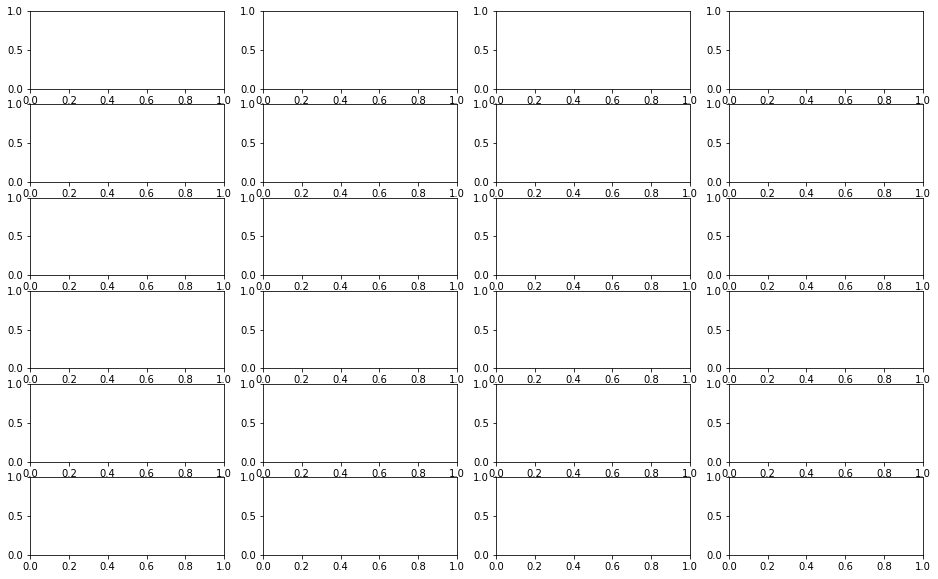

In [95]:
# Variationen um [perc] + Übergangsbereich auslassen:
%matplotlib inline
fig,ax = plt.subplots(6,4,figsize=(16, 10))

# perc[1]
ax[0,0].plot(np.array(I_PA_in_gr5[1][0]),np.array(Int_PA_in_mean_gr5[1][0]), '.-g', np.array(I_PA_abo_gr5[1][0]),np.array(Int_PA_abo_mean_gr5[1][0]),'.-r',
             np.array(I_PA_bel_gr5[1][0]),np.array(Int_PA_bel_mean_gr5[1][0]), '.-b')
ax[0,0].set_xlabel('PA $[deg]$', fontsize = 14)
ax[0,0].set_ylabel('%s %%'%perc[1], fontsize = 16, rotation = 0)
ax[0,0].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[0,0].tick_params(labelsize=15)
ax[0,0].legend(['inside', 'above', 'below'])

ax[0,1].plot(np.array(I_PA_in_gr5[1][1]),np.array(Int_PA_in_mean_gr5[1][1]), '.-g', np.array(I_PA_abo_gr5[1][1]),np.array(Int_PA_abo_mean_gr5[1][1]),'.-r',
             np.array(I_PA_bel_gr5[1][1]),np.array(Int_PA_bel_mean_gr5[1][1]), '.-b')
ax[0,1].set_xlabel('PA $[deg]$', fontsize = 14)
ax[0,1].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[0,1].tick_params(labelsize=15)

ax[0,2].plot(np.array(I_PA_in_gr5[1][2]),np.array(Int_PA_in_mean_gr5[1][2]), '.-g', np.array(I_PA_abo_gr5[1][2]),np.array(Int_PA_abo_mean_gr5[1][2]),'.-r',
             np.array(I_PA_bel_gr5[1][2]),np.array(Int_PA_bel_mean_gr5[1][2]), '.-b')
ax[0,2].set_xlabel('PA $[deg]$', fontsize = 14)
ax[0,2].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[0,2].tick_params(labelsize=15)

ax[0,3].plot(np.array(I_PA_in_gr5[1][3]),np.array(Int_PA_in_mean_gr5[1][3]), '.-g', np.array(I_PA_abo_gr5[1][3]),np.array(Int_PA_abo_mean_gr5[1][3]),'.-r',
             np.array(I_PA_bel_gr5[1][3]),np.array(Int_PA_bel_mean_gr5[1][3]), '.-b')
ax[0,3].set_xlabel('PA $[deg]$', fontsize = 14)
ax[0,3].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[0,3].tick_params(labelsize=15)


# perc[2]
ax[1,0].plot(np.array(I_PA_in_gr5[2][0]),np.array(Int_PA_in_mean_gr5[2][0]), '.-g', np.array(I_PA_abo_gr5[2][0]),np.array(Int_PA_abo_mean_gr5[2][0]),'.-r',
             np.array(I_PA_bel_gr5[2][0]),np.array(Int_PA_bel_mean_gr5[2][0]), '.-b')
ax[1,0].set_xlabel('PA $[deg]$', fontsize = 14)
ax[1,0].set_ylabel('%s %%'%perc[2], fontsize = 16, rotation = 0)
ax[1,0].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[1,0].tick_params(labelsize=15)

ax[1,1].plot(np.array(I_PA_in_gr5[2][1]),np.array(Int_PA_in_mean_gr5[2][1]), '.-g', np.array(I_PA_abo_gr5[2][1]),np.array(Int_PA_abo_mean_gr5[2][1]),'.-r',
             np.array(I_PA_bel_gr5[2][1]),np.array(Int_PA_bel_mean_gr5[2][1]), '.-b')
ax[1,1].set_xlabel('PA $[deg]$', fontsize = 14)
ax[1,1].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[1,1].tick_params(labelsize=15)

ax[1,2].plot(np.array(I_PA_in_gr5[2][2]),np.array(Int_PA_in_mean_gr5[2][2]), '.-g', np.array(I_PA_abo_gr5[2][2]),np.array(Int_PA_abo_mean_gr5[2][2]),'.-r',
             np.array(I_PA_bel_gr5[2][2]),np.array(Int_PA_bel_mean_gr5[2][2]), '.-b')
ax[1,2].set_xlabel('PA $[deg]$', fontsize = 14)
ax[1,2].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[1,2].tick_params(labelsize=15)

ax[1,3].plot(np.array(I_PA_in_gr5[2][3]),np.array(Int_PA_in_mean_gr5[2][3]), '.-g', np.array(I_PA_abo_gr5[2][3]),np.array(Int_PA_abo_mean_gr5[2][3]),'.-r',
             np.array(I_PA_bel_gr5[2][3]),np.array(Int_PA_bel_mean_gr5[2][3]), '.-b')
ax[1,3].set_xlabel('PA $[deg]$', fontsize = 14)
ax[1,3].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[1,3].tick_params(labelsize=15)


# perc[3]
ax[2,0].plot(np.array(I_PA_in_gr5[3][0]),np.array(Int_PA_in_mean_gr5[3][0]), '.-g', np.array(I_PA_abo_gr5[3][0]),np.array(Int_PA_abo_mean_gr5[3][0]),'.-r',
             np.array(I_PA_bel_gr5[3][0]),np.array(Int_PA_bel_mean_gr5[3][0]), '.-b')
ax[2,0].set_xlabel('PA $[deg]$', fontsize = 14)
ax[2,0].set_ylabel('%s %%'%perc[3], fontsize = 16, rotation = 0)
ax[2,0].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[2,0].tick_params(labelsize=15)

ax[2,1].plot(np.array(I_PA_in_gr5[3][1]),np.array(Int_PA_in_mean_gr5[3][1]), '.-g', np.array(I_PA_abo_gr5[3][1]),np.array(Int_PA_abo_mean_gr5[3][1]),'.-r',
             np.array(I_PA_bel_gr5[3][1]),np.array(Int_PA_bel_mean_gr5[3][1]), '.-b')
ax[2,1].set_xlabel('PA $[deg]$', fontsize = 14)
ax[2,1].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[2,1].tick_params(labelsize=15)

ax[2,2].plot(np.array(I_PA_in_gr5[3][2]),np.array(Int_PA_in_mean_gr5[3][2]), '.-g', np.array(I_PA_abo_gr5[3][2]),np.array(Int_PA_abo_mean_gr5[3][2]),'.-r',
             np.array(I_PA_bel_gr5[3][2]),np.array(Int_PA_bel_mean_gr5[3][2]), '.-b')
ax[2,2].set_xlabel('PA $[deg]$', fontsize = 14)
ax[2,2].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[2,2].tick_params(labelsize=15)

ax[2,3].plot(np.array(I_PA_in_gr5[3][3]),np.array(Int_PA_in_mean_gr5[3][3]), '.-g', np.array(I_PA_abo_gr5[3][3]),np.array(Int_PA_abo_mean_gr5[3][3]),'.-r',
             np.array(I_PA_bel_gr5[3][3]),np.array(Int_PA_bel_mean_gr5[3][3]), '.-b')
ax[2,3].set_xlabel('PA $[deg]$', fontsize = 14)
ax[2,3].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[2,3].tick_params(labelsize=15)


# perc[4]
ax[3,0].plot(np.array(I_PA_in_gr5[4][0]),np.array(Int_PA_in_mean_gr5[4][0]), '.-g', 
             np.array(I_PA_abo_gr5[4][0]),np.array(Int_PA_abo_mean_gr5[4][0]),'.-r',
             np.array(I_PA_bel_gr5[4][0]),np.array(Int_PA_bel_mean_gr5[4][0]), '.-b')
ax[3,0].set_xlabel('PA $[deg]$', fontsize = 14)
ax[3,0].set_ylabel('%s %%'%perc[4], fontsize = 16, rotation = 0)
ax[3,0].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[3,0].tick_params(labelsize=15)

ax[3,1].plot(np.array(I_PA_in_gr5[4][1]),np.array(Int_PA_in_mean_gr5[4][1]), '.-g', 
             np.array(I_PA_abo_gr5[4][1]),np.array(Int_PA_abo_mean_gr5[4][1]),'.-r',
             np.array(I_PA_bel_gr5[4][1]),np.array(Int_PA_bel_mean_gr5[4][1]), '.-b')
ax[3,1].set_xlabel('PA $[deg]$', fontsize = 14)
ax[3,1].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[3,1].tick_params(labelsize=15)

ax[3,2].plot(np.array(I_PA_in_gr5[4][2]),np.array(Int_PA_in_mean_gr5[4][2]), '.-g', 
             np.array(I_PA_abo_gr5[4][2]),np.array(Int_PA_abo_mean_gr5[4][2]),'.-r',
             np.array(I_PA_bel_gr5[4][2]),np.array(Int_PA_bel_mean_gr5[4][2]), '.-b')
ax[3,2].set_xlabel('PA $[deg]$', fontsize = 14)
ax[3,2].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[3,2].tick_params(labelsize=15)

ax[3,3].plot(np.array(I_PA_in_gr5[4][3]),np.array(Int_PA_in_mean_gr5[4][3]), '.-g', 
             np.array(I_PA_abo_gr5[4][3]),np.array(Int_PA_abo_mean_gr5[4][3]),'.-r',
             np.array(I_PA_bel_gr5[4][3]),np.array(Int_PA_bel_mean_gr5[4][3]), '.-b')
ax[3,3].set_xlabel('PA $[deg]$', fontsize = 14)
ax[3,3].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[3,3].tick_params(labelsize=15)


# perc[0] for above,below; perc[4] for inside:
ax[4,0].plot(np.array(I_PA_in_gr5[4][0]),np.array(Int_PA_in_mean_gr5[4][0]), '.-g', np.array(I_PA_abo_gr5[0][0]),np.array(Int_PA_abo_mean_gr5[0][0]),'.-r',
             np.array(I_PA_bel_gr5[0][0]),np.array(Int_PA_bel_mean_gr5[0][0]), '.-b')
ax[4,0].set_xlabel('PA $[deg]$', fontsize = 14)
ax[4,0].set_ylabel('%s %% for\n above, below;\n %s %% for inside'%(perc[0],perc[4]), fontsize = 16)
ax[4,0].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[4,0].tick_params(labelsize=15)

ax[4,1].plot(np.array(I_PA_in_gr5[4][1]),np.array(Int_PA_in_mean_gr5[4][1]), '.-g', np.array(I_PA_abo_gr5[0][1]),np.array(Int_PA_abo_mean_gr5[0][1]),'.-r',
             np.array(I_PA_bel_gr5[0][1]),np.array(Int_PA_bel_mean_gr5[0][1]), '.-b')
ax[4,1].set_xlabel('PA $[deg]$', fontsize = 14)
ax[4,1].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[4,1].tick_params(labelsize=15)

ax[4,2].plot(np.array(I_PA_in_gr5[4][2]),np.array(Int_PA_in_mean_gr5[4][2]), '.-g', np.array(I_PA_abo_gr5[0][2]),np.array(Int_PA_abo_mean_gr5[0][2]),'.-r',
             np.array(I_PA_bel_gr5[0][2]),np.array(Int_PA_bel_mean_gr5[0][2]), '.-b')
ax[4,2].set_xlabel('PA $[deg]$', fontsize = 14)
ax[4,2].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[4,2].tick_params(labelsize=15)

ax[4,3].plot(np.array(I_PA_in_gr5[4][3]),np.array(Int_PA_in_mean_gr5[4][3]), '.-g', np.array(I_PA_abo_gr5[0][3]),np.array(Int_PA_abo_mean_gr5[0][3]),'.-r',
             np.array(I_PA_bel_gr5[0][3]),np.array(Int_PA_bel_mean_gr5[0][3]), '.-b')
ax[4,3].set_xlabel('PA $[deg]$', fontsize = 14)
ax[4,3].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[4,3].tick_params(labelsize=15)


# perc[4] for edge, edge_above, edge_below:
ax[5,0].plot(np.array(I_PA_edge_gr5[4][0]),np.array(Int_PA_edge_mean_gr5[4][0]), '.-y',
            np.array(I_PA_edgeabo_gr5[4][0]),np.array(Int_PA_edgeabo_mean_gr5[4][0]), '^-c',
             np.array(I_PA_edgebel_gr5[4][0]),np.array(Int_PA_edgebel_mean_gr5[4][0]), 'v-m')
ax[5,0].set_xlabel('PA $[deg]$', fontsize = 14)
ax[5,0].set_ylabel('transition regions', fontsize = 16)
ax[5,0].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[5,0].tick_params(labelsize=15)
ax[5,0].legend(['trans', 'trans_abo', 'trans_bel'])

ax[5,1].plot(np.array(I_PA_edge_gr5[4][1]),np.array(Int_PA_edge_mean_gr5[4][1]), '.-y',
            np.array(I_PA_edgeabo_gr5[4][1]),np.array(Int_PA_edgeabo_mean_gr5[4][1]), '^-c',
             np.array(I_PA_edgebel_gr5[4][1]),np.array(Int_PA_edgebel_mean_gr5[4][1]), 'v-m')
ax[5,1].set_xlabel('PA $[deg]$', fontsize = 14)
ax[5,1].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[5,1].tick_params(labelsize=15)

ax[5,2].plot(np.array(I_PA_edge_gr5[4][2]),np.array(Int_PA_edge_mean_gr5[4][2]), '.-y',
            np.array(I_PA_edgeabo_gr5[4][2]),np.array(Int_PA_edgeabo_mean_gr5[4][2]), '^-c',
             np.array(I_PA_edgebel_gr5[4][2]),np.array(Int_PA_edgebel_mean_gr5[4][2]), 'v-m')
ax[5,2].set_xlabel('PA $[deg]$', fontsize = 14)
ax[5,2].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[5,2].tick_params(labelsize=15)

ax[5,3].plot(np.array(I_PA_edge_gr5[4][3]),np.array(Int_PA_edge_mean_gr5[4][3]), '.-y',
            np.array(I_PA_edgeabo_gr5[4][3]),np.array(Int_PA_edgeabo_mean_gr5[4][3]), '^-c',
             np.array(I_PA_edgebel_gr5[4][3]),np.array(Int_PA_edgebel_mean_gr5[4][3]), 'v-m')
ax[5,3].set_xlabel('PA $[deg]$', fontsize = 14)
ax[5,3].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[5,3].tick_params(labelsize=15)

plt.show()
fig.tight_layout(h_pad=0.2)
#fig.savefig('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/%s/%s_analysis_percentages.pdf'%(answer_Orbit[0:7],answer_Orbit[0:7]),bbox_inches='tight')

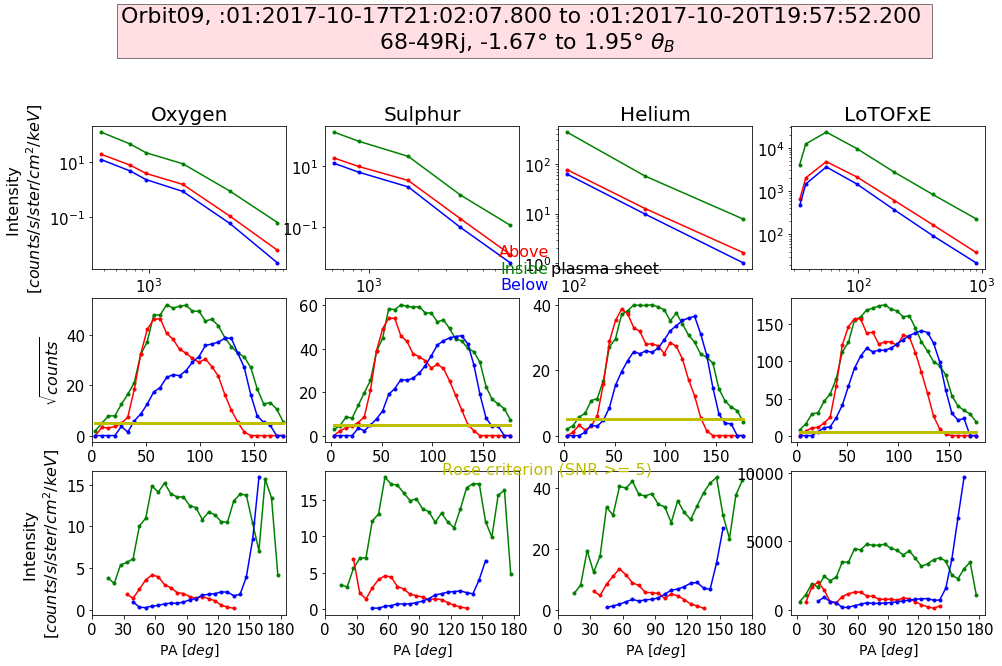

In [96]:
# Plot:
%matplotlib inline
fig,ax = plt.subplots(3,4,figsize=(16, 9))

perc_select = 0
# Energy:
ax[0,0].loglog(np.array(I_E[0][0]),np.array(Int_E_mean[0][perc_select][0]), '.-g', 
               np.array(I_E[0][0]),np.array(Int_E_mean[1][perc_select][0]),'.-r',
               np.array(I_E[0][0]),np.array(Int_E_mean[2][perc_select][0]), '.-b')
ax[0,0].set_xlabel('E $[keV]$', fontsize = 14)
ax[0,0].set_ylabel('Intensity \n$[counts/s/ster/cm^2/keV]$', fontsize = 16)
ax[0,0].set_title('Oxygen', fontsize = 20)
ax[0,0].tick_params(labelsize=15)

ax[0,1].loglog(np.array(I_E[1][0]),np.array(Int_E_mean[0][perc_select][1]), '.-g', 
               np.array(I_E[1][0]),np.array(Int_E_mean[1][perc_select][1]),'.-r',
               np.array(I_E[1][0]),np.array(Int_E_mean[2][perc_select][1]), '.-b')
ax[0,1].set_xlabel('E $[keV]$', fontsize = 14)
ax[0,1].set_title('Sulphur', fontsize = 20)
ax[0,1].tick_params(labelsize=15)

ax[0,2].loglog(np.array(I_E[2][0]),np.array(Int_E_mean[0][perc_select][2]), '.-g', 
               np.array(I_E[2][0]),np.array(Int_E_mean[1][perc_select][2]),'.-r',
               np.array(I_E[2][0]),np.array(Int_E_mean[2][perc_select][2]), '.-b')
ax[0,2].set_xlabel('E $[keV]$', fontsize = 14)
ax[0,2].set_title('Helium', fontsize = 20)
ax[0,2].tick_params(labelsize=15)

ax[0,3].loglog(np.array(I_E[3][0]),np.array(Int_E_mean[0][perc_select][3]), '.-g', 
               np.array(I_E[3][0]),np.array(Int_E_mean[1][perc_select][3]),'.-r',
               np.array(I_E[3][0]),np.array(Int_E_mean[2][perc_select][3]), '.-b')
ax[0,3].set_xlabel('E $[keV]$', fontsize = 14)
ax[0,3].set_title('%s'%answer_Proton, fontsize = 20)
ax[0,3].tick_params(labelsize=15)


# SNR = sqrt(counts)
ax[1,0].plot(np.array(I_PA[0][0]),np.array(PA_sqrt_counts[0][perc_select][0]), '.-g', 
             np.array(I_PA[0][0]),np.array(PA_sqrt_counts[1][perc_select][0]),'.-r',
             np.array(I_PA[0][0]),np.array(PA_sqrt_counts[2][perc_select][0]), '.-b')
ax[1,0].plot(np.array(I_PA[0][0]),np.linspace(5,5.000001,30), '-y', linewidth = 3)
ax[1,0].set_xlabel('PA $[deg]$', fontsize = 14)
ax[1,0].set_ylabel('$\sqrt{counts}$', fontsize = 16)
ax[1,0].set_xlim([0, 180])
ax[1,0].tick_params(labelsize=15)

ax[1,1].plot(np.array(I_PA[1][0]),np.array(PA_sqrt_counts[0][perc_select][1]), '.-g', 
             np.array(I_PA[1][0]),np.array(PA_sqrt_counts[1][perc_select][1]),'.-r',
             np.array(I_PA[1][0]),np.array(PA_sqrt_counts[2][perc_select][1]), '.-b')
ax[1,1].plot(np.array(I_PA[0][0]),np.linspace(5,5.000001,30), '-y', linewidth = 3)
ax[1,1].set_xlabel('PA $[deg]$', fontsize = 14)
ax[1,1].tick_params(labelsize=15)

ax[1,2].plot(np.array(I_PA[2][0]),np.array(PA_sqrt_counts[0][perc_select][2]), '.-g', 
             np.array(I_PA[2][0]),np.array(PA_sqrt_counts[1][perc_select][2]),'.-r',
             np.array(I_PA[2][0]),np.array(PA_sqrt_counts[2][perc_select][2]), '.-b')
ax[1,2].plot(np.array(I_PA[0][0]),np.linspace(5,5.000001,30), '-y', linewidth = 3)
ax[1,2].set_xlabel('PA $[deg]$', fontsize = 14)
ax[1,2].tick_params(labelsize=15)

ax[1,3].plot(np.array(I_PA[3][0]),np.array(PA_sqrt_counts[0][perc_select][3]), '.-g', 
             np.array(I_PA[3][0]),np.array(PA_sqrt_counts[1][perc_select][3]),'.-r',
             np.array(I_PA[3][0]),np.array(PA_sqrt_counts[2][perc_select][3]), '.-b')
ax[1,3].plot(np.array(I_PA[0][0]),np.linspace(5,5.000001,30), '-y', linewidth = 3)
ax[1,3].set_xlabel('PA $[deg]$', fontsize = 14)
ax[1,3].tick_params(labelsize=15)


# Pitch angle:
ax[2,0].plot(np.array(I_PA_gr5[0][perc_select][0]),np.array(Int_PA_mean_gr5[0][perc_select][0]), '.-g', 
             np.array(I_PA_gr5[1][perc_select][0]),np.array(Int_PA_mean_gr5[1][perc_select][0]),'.-r',
             np.array(I_PA_gr5[2][perc_select][0]),np.array(Int_PA_mean_gr5[2][perc_select][0]), '.-b')
ax[2,0].set_xlabel('PA $[deg]$', fontsize = 14)
ax[2,0].set_ylabel('Intensity \n$[counts/s/ster/cm^2/keV]$', fontsize = 16)
ax[2,0].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[2,0].tick_params(labelsize=15)

ax[2,1].plot(np.array(I_PA_gr5[0][perc_select][1]),np.array(Int_PA_mean_gr5[0][perc_select][1]), '.-g', 
             np.array(I_PA_gr5[1][perc_select][1]),np.array(Int_PA_mean_gr5[1][perc_select][1]),'.-r',
             np.array(I_PA_gr5[2][perc_select][1]),np.array(Int_PA_mean_gr5[2][perc_select][1]), '.-b')
ax[2,1].set_xlabel('PA $[deg]$', fontsize = 14)
ax[2,1].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[2,1].tick_params(labelsize=15)

ax[2,2].plot(np.array(I_PA_gr5[0][perc_select][2]),np.array(Int_PA_mean_gr5[0][perc_select][2]), '.-g', 
             np.array(I_PA_gr5[1][perc_select][2]),np.array(Int_PA_mean_gr5[1][perc_select][2]),'.-r',
             np.array(I_PA_gr5[2][perc_select][2]),np.array(Int_PA_mean_gr5[2][perc_select][2]), '.-b')
ax[2,2].set_xlabel('PA $[deg]$', fontsize = 14)
ax[2,2].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[2,2].tick_params(labelsize=15)

ax[2,3].plot(np.array(I_PA_gr5[0][perc_select][3]),np.array(Int_PA_mean_gr5[0][perc_select][3]), '.-g', 
             np.array(I_PA_gr5[1][perc_select][3]),np.array(Int_PA_mean_gr5[1][perc_select][3]),'.-r',
             np.array(I_PA_gr5[2][perc_select][3]),np.array(Int_PA_mean_gr5[2][perc_select][3]), '.-b')
ax[2,3].set_xlabel('PA $[deg]$', fontsize = 14)
ax[2,3].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[2,3].tick_params(labelsize=15)


#img1 = mpimg.imread('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/%sPA_O_S_He.png'%answer_Orbit)
#ax[4,0].imshow(img1)
#plt.subplot(511)
#plt.imshow(img1)
theta = r'$\theta_B$'
fig.text(0.5,1, '%s, %s to %s \n %s-%sRj, %s° to %s° %s'%(answer_Orbit[0:7],
                                                          time_Int[0],time_Int[-1],round(B[7][1]),round(B[7][-1]),
                                                          round(B[5][1],2),round(B[5][-1],2),theta),
         fontsize = 22, horizontalalignment='center',bbox=dict(facecolor='pink', alpha=0.5))
fig.text(0.52, 0.35, 'Rose criterion (SNR >= 5)', ha='center', va='center', color = 'y', fontsize = 16)
fig.text(0.5, 0.685, 'Above', ha='center', va='center', color = 'r',fontsize = 16)
fig.text(0.5, 0.66, 'Inside', ha='center', va='center', color = 'g',fontsize = 16)
fig.text(0.5, 0.635, 'Below', ha='center', va='center', color = 'b',fontsize = 16)
fig.text(0.57, 0.66, 'plasma sheet', ha='center', va='center', fontsize = 16)

plt.show()
fig.tight_layout(h_pad=3)
#fig.savefig('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/%s/%s_analysis_meanVar.pdf'%(answer_Orbit[0:7],
#                                                                                       answer_Orbit[0:7]),
#            bbox_inches='tight')

NameError: name 'I_PA_in_gr5' is not defined

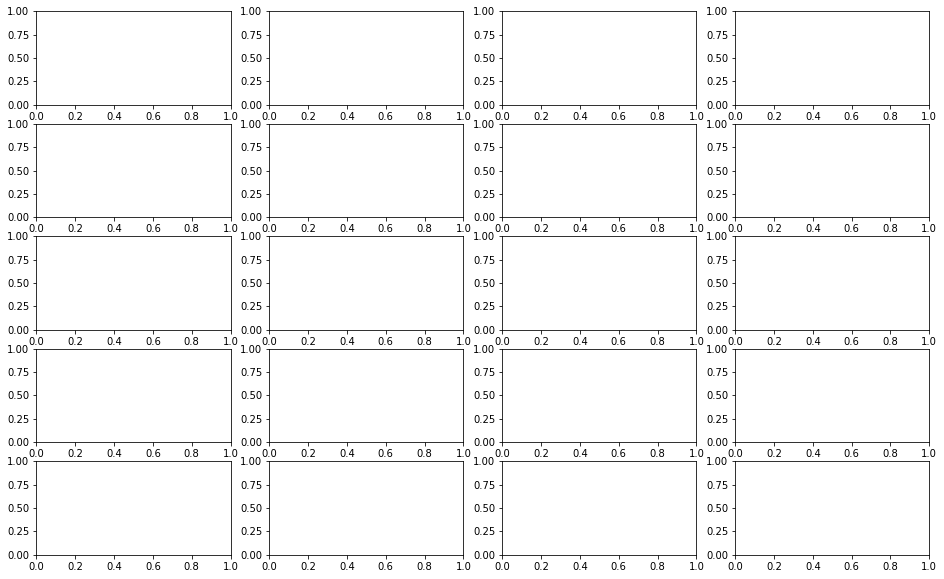

In [97]:
# Variationen um [perc] + Übergangsbereich auslassen:
%matplotlib inline
fig,ax = plt.subplots(5,4,figsize=(16, 10))

# perc[1]
ax[0,0].plot(np.array(I_PA_in_gr5[1][0]),np.array(Int_PA_in_mean_gr5[1][0]), '.-g', np.array(I_PA_abo_gr5[1][0]),np.array(Int_PA_abo_mean_gr5[1][0]),'.-r',
             np.array(I_PA_bel_gr5[1][0]),np.array(Int_PA_bel_mean_gr5[1][0]), '.-b')
ax[0,0].set_xlabel('PA $[deg]$', fontsize = 14)
ax[0,0].set_ylabel('%s %%'%perc[1], fontsize = 16, rotation = 0)
ax[0,0].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[0,0].tick_params(labelsize=15)
#ax[0,0].legend(['inside', 'above', 'below'])

ax[0,1].plot(np.array(I_PA_in_gr5[1][1]),np.array(Int_PA_in_mean_gr5[1][1]), '.-g', np.array(I_PA_abo_gr5[1][1]),np.array(Int_PA_abo_mean_gr5[1][1]),'.-r',
             np.array(I_PA_bel_gr5[1][1]),np.array(Int_PA_bel_mean_gr5[1][1]), '.-b')
ax[0,1].set_xlabel('PA $[deg]$', fontsize = 14)
ax[0,1].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[0,1].tick_params(labelsize=15)

ax[0,2].plot(np.array(I_PA_in_gr5[1][2]),np.array(Int_PA_in_mean_gr5[1][2]), '.-g', np.array(I_PA_abo_gr5[1][2]),np.array(Int_PA_abo_mean_gr5[1][2]),'.-r',
             np.array(I_PA_bel_gr5[1][2]),np.array(Int_PA_bel_mean_gr5[1][2]), '.-b')
ax[0,2].set_xlabel('PA $[deg]$', fontsize = 14)
ax[0,2].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[0,2].tick_params(labelsize=15)

ax[0,3].plot(np.array(I_PA_in_gr5[1][3]),np.array(Int_PA_in_mean_gr5[1][3]), '.-g', np.array(I_PA_abo_gr5[1][3]),np.array(Int_PA_abo_mean_gr5[1][3]),'.-r',
             np.array(I_PA_bel_gr5[1][3]),np.array(Int_PA_bel_mean_gr5[1][3]), '.-b')
ax[0,3].set_xlabel('PA $[deg]$', fontsize = 14)
ax[0,3].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[0,3].tick_params(labelsize=15)


# perc[2]
ax[1,0].plot(np.array(I_PA_in_gr5[2][0]),np.array(Int_PA_in_mean_gr5[2][0]), '.-g', np.array(I_PA_abo_gr5[2][0]),np.array(Int_PA_abo_mean_gr5[2][0]),'.-r',
             np.array(I_PA_bel_gr5[2][0]),np.array(Int_PA_bel_mean_gr5[2][0]), '.-b')
ax[1,0].set_xlabel('PA $[deg]$', fontsize = 14)
ax[1,0].set_ylabel('%s %%'%perc[2], fontsize = 16, rotation = 0)
ax[1,0].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[1,0].tick_params(labelsize=15)

ax[1,1].plot(np.array(I_PA_in_gr5[2][1]),np.array(Int_PA_in_mean_gr5[2][1]), '.-g', np.array(I_PA_abo_gr5[2][1]),np.array(Int_PA_abo_mean_gr5[2][1]),'.-r',
             np.array(I_PA_bel_gr5[2][1]),np.array(Int_PA_bel_mean_gr5[2][1]), '.-b')
ax[1,1].set_xlabel('PA $[deg]$', fontsize = 14)
ax[1,1].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[1,1].tick_params(labelsize=15)

ax[1,2].plot(np.array(I_PA_in_gr5[2][2]),np.array(Int_PA_in_mean_gr5[2][2]), '.-g', np.array(I_PA_abo_gr5[2][2]),np.array(Int_PA_abo_mean_gr5[2][2]),'.-r',
             np.array(I_PA_bel_gr5[2][2]),np.array(Int_PA_bel_mean_gr5[2][2]), '.-b')
ax[1,2].set_xlabel('PA $[deg]$', fontsize = 14)
ax[1,2].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[1,2].tick_params(labelsize=15)

ax[1,3].plot(np.array(I_PA_in_gr5[2][3]),np.array(Int_PA_in_mean_gr5[2][3]), '.-g', np.array(I_PA_abo_gr5[2][3]),np.array(Int_PA_abo_mean_gr5[2][3]),'.-r',
             np.array(I_PA_bel_gr5[2][3]),np.array(Int_PA_bel_mean_gr5[2][3]), '.-b')
ax[1,3].set_xlabel('PA $[deg]$', fontsize = 14)
ax[1,3].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[1,3].tick_params(labelsize=15)


# perc[3]
ax[2,0].plot(np.array(I_PA_in_gr5[3][0]),np.array(Int_PA_in_mean_gr5[3][0]), '.-g', np.array(I_PA_abo_gr5[3][0]),np.array(Int_PA_abo_mean_gr5[3][0]),'.-r',
             np.array(I_PA_bel_gr5[3][0]),np.array(Int_PA_bel_mean_gr5[3][0]), '.-b')
ax[2,0].set_xlabel('PA $[deg]$', fontsize = 14)
ax[2,0].set_ylabel('%s %%'%perc[3], fontsize = 16, rotation = 0)
ax[2,0].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[2,0].tick_params(labelsize=15)

ax[2,1].plot(np.array(I_PA_in_gr5[3][1]),np.array(Int_PA_in_mean_gr5[3][1]), '.-g', np.array(I_PA_abo_gr5[3][1]),np.array(Int_PA_abo_mean_gr5[3][1]),'.-r',
             np.array(I_PA_bel_gr5[3][1]),np.array(Int_PA_bel_mean_gr5[3][1]), '.-b')
ax[2,1].set_xlabel('PA $[deg]$', fontsize = 14)
ax[2,1].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[2,1].tick_params(labelsize=15)

ax[2,2].plot(np.array(I_PA_in_gr5[3][2]),np.array(Int_PA_in_mean_gr5[3][2]), '.-g', np.array(I_PA_abo_gr5[3][2]),np.array(Int_PA_abo_mean_gr5[3][2]),'.-r',
             np.array(I_PA_bel_gr5[3][2]),np.array(Int_PA_bel_mean_gr5[3][2]), '.-b')
ax[2,2].set_xlabel('PA $[deg]$', fontsize = 14)
ax[2,2].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[2,2].tick_params(labelsize=15)

ax[2,3].plot(np.array(I_PA_in_gr5[3][3]),np.array(Int_PA_in_mean_gr5[3][3]), '.-g', np.array(I_PA_abo_gr5[3][3]),np.array(Int_PA_abo_mean_gr5[3][3]),'.-r',
             np.array(I_PA_bel_gr5[3][3]),np.array(Int_PA_bel_mean_gr5[3][3]), '.-b')
ax[2,3].set_xlabel('PA $[deg]$', fontsize = 14)
ax[2,3].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[2,3].tick_params(labelsize=15)


# perc[0] for above,below; perc[3] for inside:
ax[3,0].plot(np.array(I_PA_in_gr5[3][0]),np.array(Int_PA_in_mean_gr5[3][0]), '.-g', np.array(I_PA_abo_gr5[0][0]),np.array(Int_PA_abo_mean_gr5[0][0]),'.-r',
             np.array(I_PA_bel_gr5[0][0]),np.array(Int_PA_bel_mean_gr5[0][0]), '.-b', np.array(I_PA_edge_gr5[3][0]),np.array(Int_PA_edge_mean_gr5[3][0]), '.-y')
ax[3,0].set_xlabel('PA $[deg]$', fontsize = 14)
ax[3,0].set_ylabel('%s %% for\n above, below;\n %s %% for inside'%(perc[0],perc[3]), fontsize = 16)
ax[3,0].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[3,0].tick_params(labelsize=15)

ax[3,1].plot(np.array(I_PA_in_gr5[3][1]),np.array(Int_PA_in_mean_gr5[3][1]), '.-g', np.array(I_PA_abo_gr5[0][1]),np.array(Int_PA_abo_mean_gr5[0][1]),'.-r',
             np.array(I_PA_bel_gr5[0][1]),np.array(Int_PA_bel_mean_gr5[0][1]), '.-b', np.array(I_PA_edge_gr5[3][1]),np.array(Int_PA_edge_mean_gr5[3][1]), '.-y')
ax[3,1].set_xlabel('PA $[deg]$', fontsize = 14)
ax[3,1].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[3,1].tick_params(labelsize=15)

ax[3,2].plot(np.array(I_PA_in_gr5[3][2]),np.array(Int_PA_in_mean_gr5[3][2]), '.-g', np.array(I_PA_abo_gr5[0][2]),np.array(Int_PA_abo_mean_gr5[0][2]),'.-r',
             np.array(I_PA_bel_gr5[0][2]),np.array(Int_PA_bel_mean_gr5[0][2]), '.-b', np.array(I_PA_edge_gr5[3][2]),np.array(Int_PA_edge_mean_gr5[3][2]), '.-y')
ax[3,2].set_xlabel('PA $[deg]$', fontsize = 14)
ax[3,2].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[3,2].tick_params(labelsize=15)

ax[3,3].plot(np.array(I_PA_in_gr5[3][3]),np.array(Int_PA_in_mean_gr5[3][3]), '.-g', np.array(I_PA_abo_gr5[0][3]),np.array(Int_PA_abo_mean_gr5[0][3]),'.-r',
             np.array(I_PA_bel_gr5[0][3]),np.array(Int_PA_bel_mean_gr5[0][3]), '.-b', np.array(I_PA_edge_gr5[3][3]),np.array(Int_PA_edge_mean_gr5[3][3]), '.-y')
ax[3,3].set_xlabel('PA $[deg]$', fontsize = 14)
ax[3,3].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[3,3].tick_params(labelsize=15)
ax[3,0].legend(['inside', 'above', 'below', 'edges'], loc = 'best')


# perc[3] for edge, edge_above, edge_below:
ax[4,0].plot(np.array(I_PA_edgeabo_gr5[3][0]),np.array(Int_PA_edgeabo_mean_gr5[3][0]), '^-c',np.array(I_PA_edgebel_gr5[3][0]),np.array(Int_PA_edgebel_mean_gr5[3][0]), 'v-m')
ax[4,0].set_xlabel('PA $[deg]$', fontsize = 14)
ax[4,0].set_ylabel('transition regions', fontsize = 16)
ax[4,0].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[4,0].tick_params(labelsize=15)
ax[4,0].legend(['trans', 'trans_abo', 'trans_bel'])

ax[4,1].plot(np.array(I_PA_edgeabo_gr5[3][1]),np.array(Int_PA_edgeabo_mean_gr5[3][1]), '^-c',np.array(I_PA_edgebel_gr5[3][1]),np.array(Int_PA_edgebel_mean_gr5[3][1]), 'v-m')
ax[4,1].set_xlabel('PA $[deg]$', fontsize = 14)
ax[4,1].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[4,1].tick_params(labelsize=15)

ax[4,2].plot(np.array(I_PA_edgeabo_gr5[3][2]),np.array(Int_PA_edgeabo_mean_gr5[3][2]), '^-c',np.array(I_PA_edgebel_gr5[3][2]),np.array(Int_PA_edgebel_mean_gr5[3][2]), 'v-m')
ax[4,2].set_xlabel('PA $[deg]$', fontsize = 14)
ax[4,2].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[4,2].tick_params(labelsize=15)

ax[4,3].plot(np.array(I_PA_edgeabo_gr5[3][3]),np.array(Int_PA_edgeabo_mean_gr5[3][3]), '^-c',np.array(I_PA_edgebel_gr5[3][3]),np.array(Int_PA_edgebel_mean_gr5[3][3]), 'v-m')
ax[4,3].set_xlabel('PA $[deg]$', fontsize = 14)
ax[4,3].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[4,3].tick_params(labelsize=15)

plt.show()
fig.tight_layout(h_pad=0.2)
#fig.savefig('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/%s/%s_analysis_meanVar_percVar.pdf'%(answer_Orbit[0:7],answer_Orbit[0:7]),bbox_inches='tight')

In [99]:
import matplotlib.image as mpimg
from IPython.display import Image

In [100]:
img = mpimg.imread('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit04/20-23_1_En_PA_plot.png')
imgplot = plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: '/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit04/20-23_1_En_PA_plot.png'

NameError: name 'img' is not defined

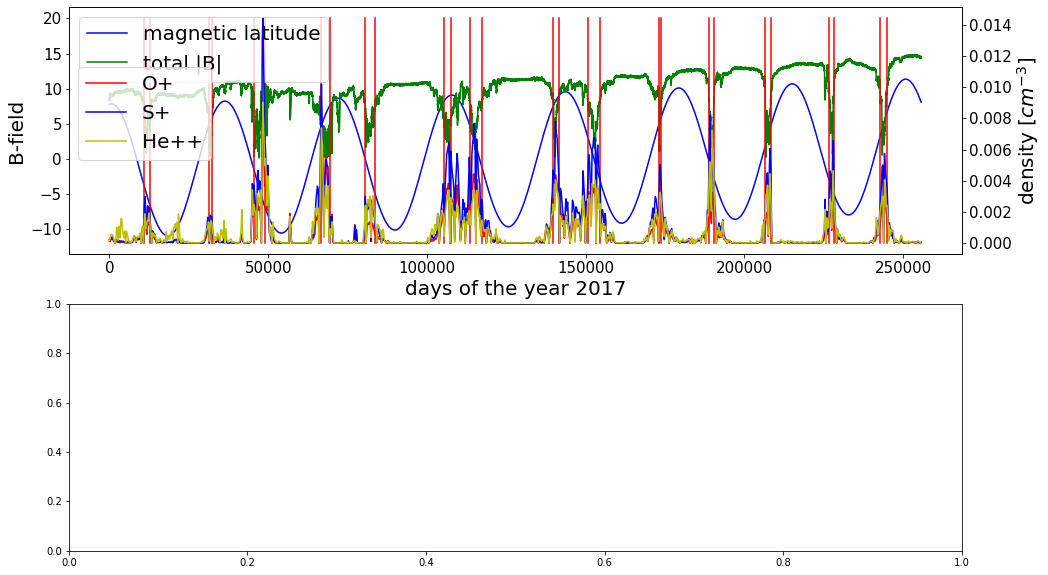

In [98]:
fig,ax1 = plt.subplots(2,1,figsize=(16,10))

#ax1[0] = plt.subplot(1,1,1)
ax1[0].plot(B[6], '-b', B[8], '-g')
ax1[0].legend(['magnetic latitude','total |B|'],fontsize=20, loc = 0)
ax1[0].tick_params(labelsize=15)
ax1[0].set_ylabel('B-field', fontsize=20)
ax1[0].set_xlabel('days of the year 2017',fontsize=20)



ax2 = ax1[0].twinx()
ax2.plot(n_interp[0],'-r', n_interp[1],'-b', n_interp[2],'-y')
ax2.set_xlabel('days of the year 2017',fontsize=20)
ax2.set_ylabel('density [$cm^{-3}$]', fontsize=20)
ax2.legend(['O+', 'S+' ,'He++'],fontsize=20, loc=[0.01,0.38])
ax2.tick_params(labelsize=15)

#ax3 = ax1.twinx()
for val in ipt:
    ax1[0].plot((val,val),(-12, 20),'r')


#Image('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit04/20-23_1_En_PA_plot.png')

ax1[1].imshow(img)
ax1[1]

#fig.savefig('maglat_B_dens_ipt_orbit02.png',bbox_inches='tight')

In [201]:
img1 = mpimg.imread('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit01_O.png')
img2 = mpimg.imread('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit02_O.png')
img3 = mpimg.imread('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit03_O.png')
img4 = mpimg.imread('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit04_O.png')
img5 = mpimg.imread('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit05_O.png')
img6 = mpimg.imread('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit06_O.png')
img7 = mpimg.imread('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit07_O.png')
img8 = mpimg.imread('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit08_O.png')
img9 = mpimg.imread('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit09_O.png')
img10 = mpimg.imread('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit10_O.png')
img11 = mpimg.imread('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit11_O.png')
img12 = mpimg.imread('/afs/rrz.uni-koeln.de/geo/user/mschoef2/data/Orbit12_O.png')
#imgplot = plt.imshow(img1)

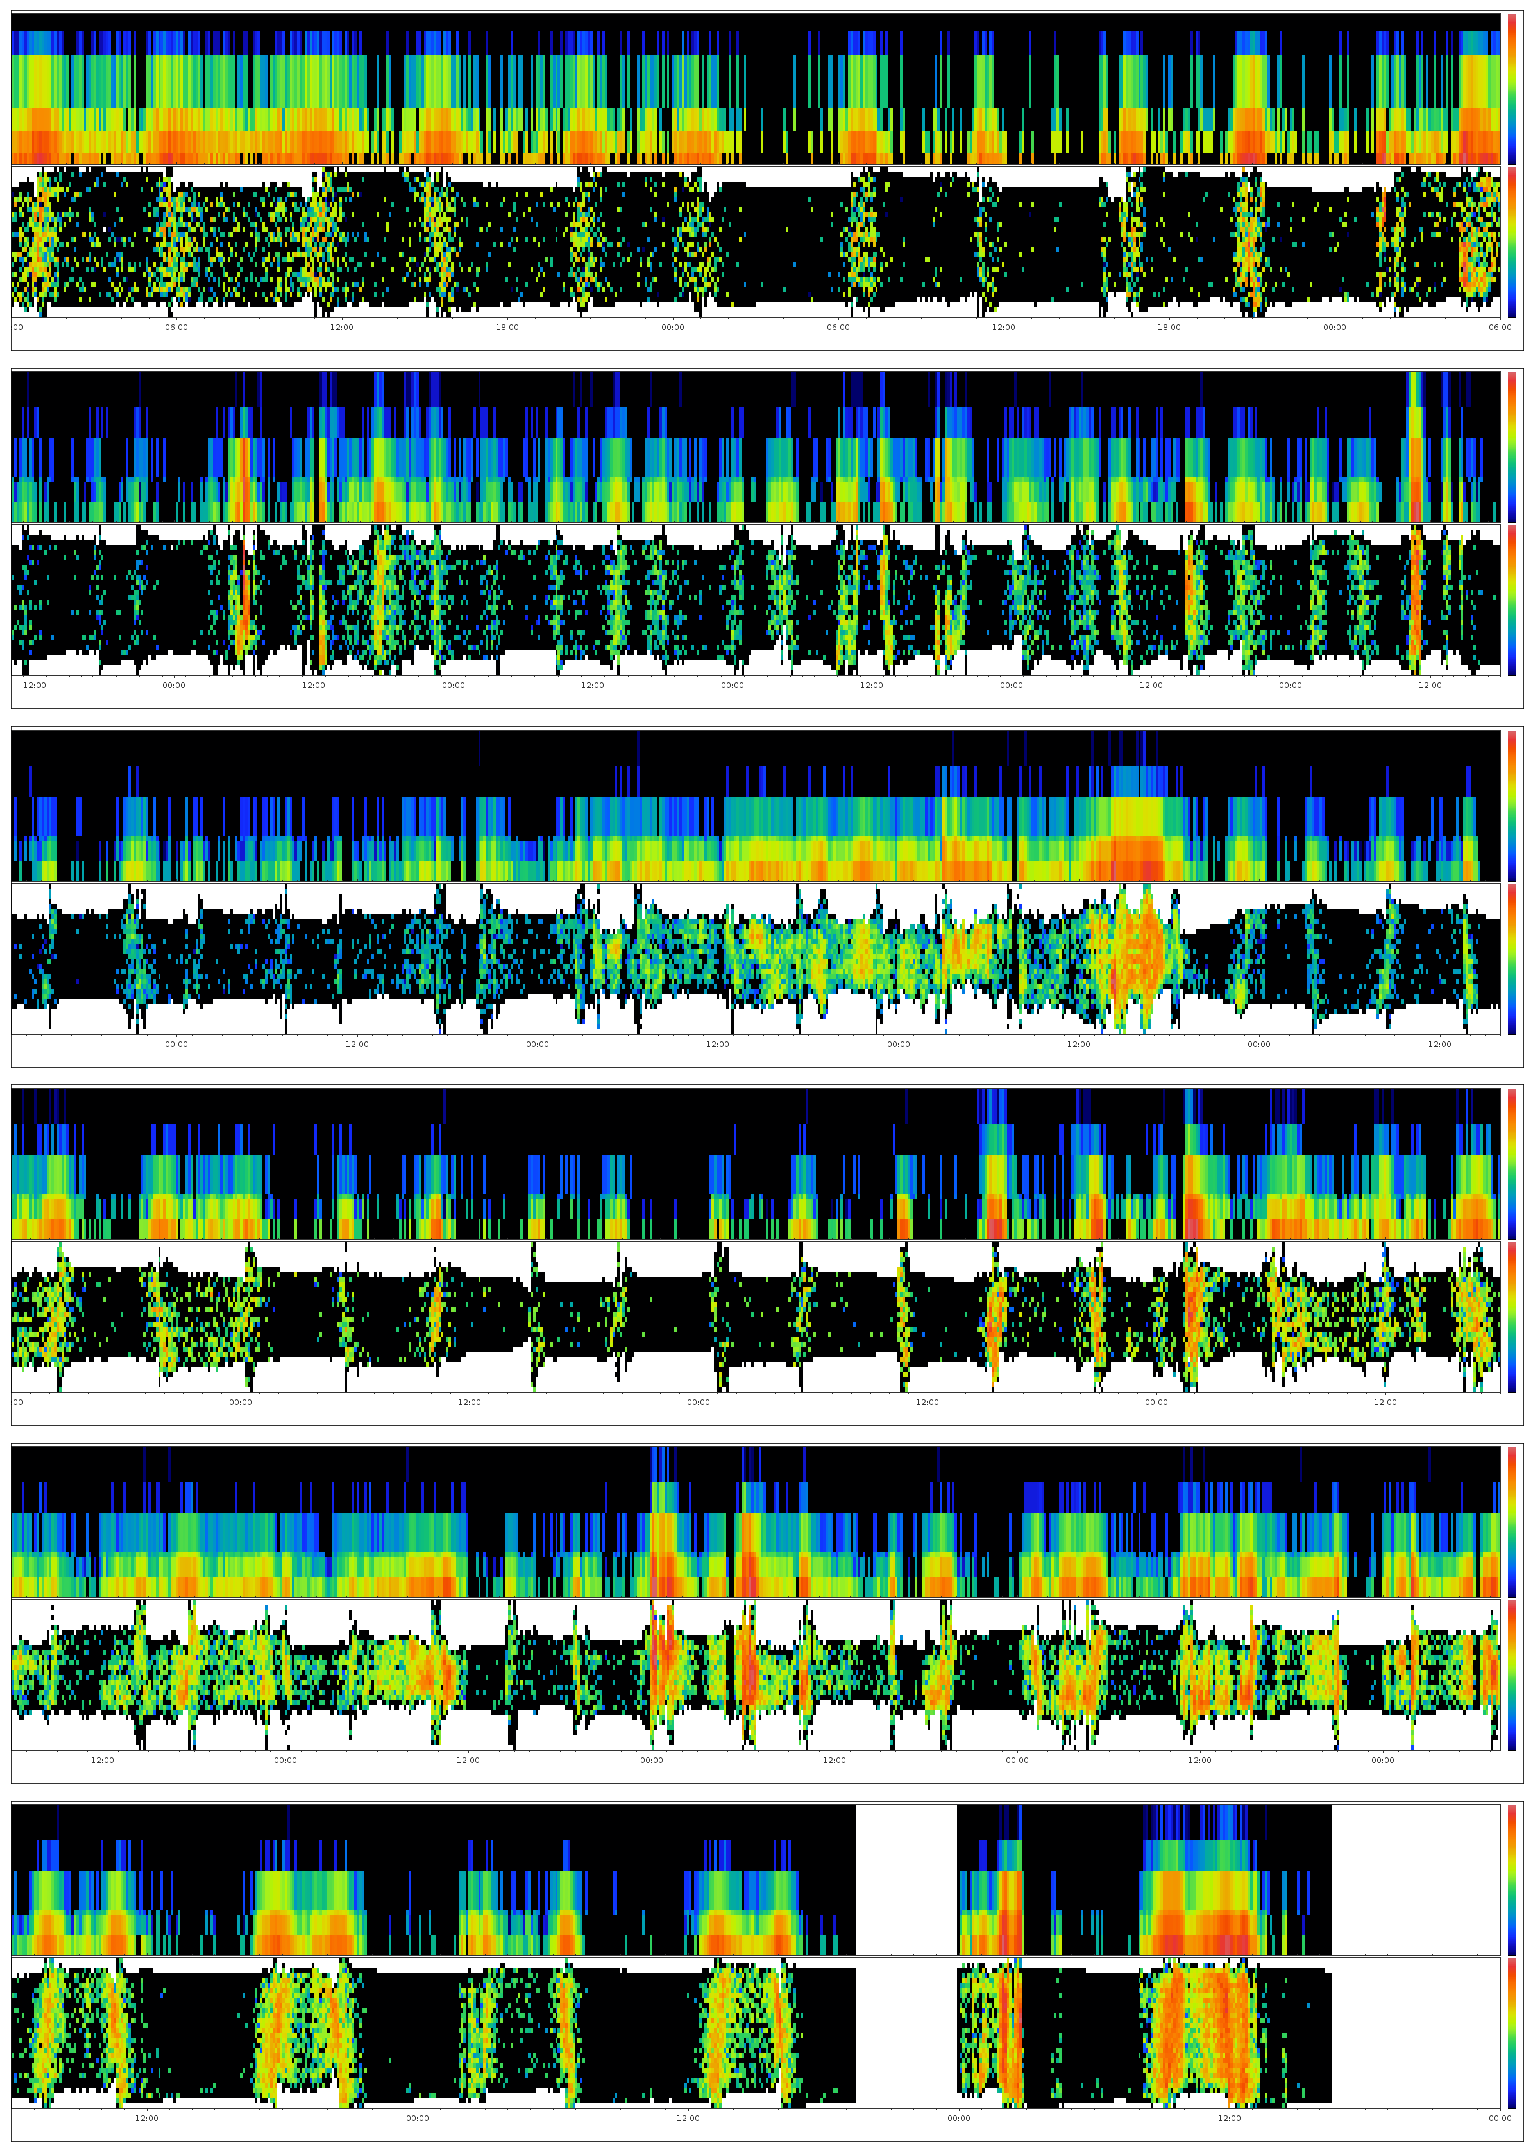

In [202]:
fig,ax = plt.subplots(6,1,figsize=(50,30))

ax[0].imshow(img1)
ax[0].xaxis.set_visible(False)
ax[0].yaxis.set_visible(False)
ax[1].imshow(img2)
ax[1].xaxis.set_visible(False)
ax[1].yaxis.set_visible(False)
ax[2].imshow(img3)
ax[2].xaxis.set_visible(False)
ax[2].yaxis.set_visible(False)
ax[3].imshow(img4)
ax[3].xaxis.set_visible(False)
ax[3].yaxis.set_visible(False)
ax[4].imshow(img5)
ax[4].xaxis.set_visible(False)
ax[4].yaxis.set_visible(False)
ax[5].imshow(img6)
ax[5].xaxis.set_visible(False)
ax[5].yaxis.set_visible(False)
plt.tight_layout()

#fig.savefig('En_PA_Orbit1-6_O.png',bbox_inches='tight')

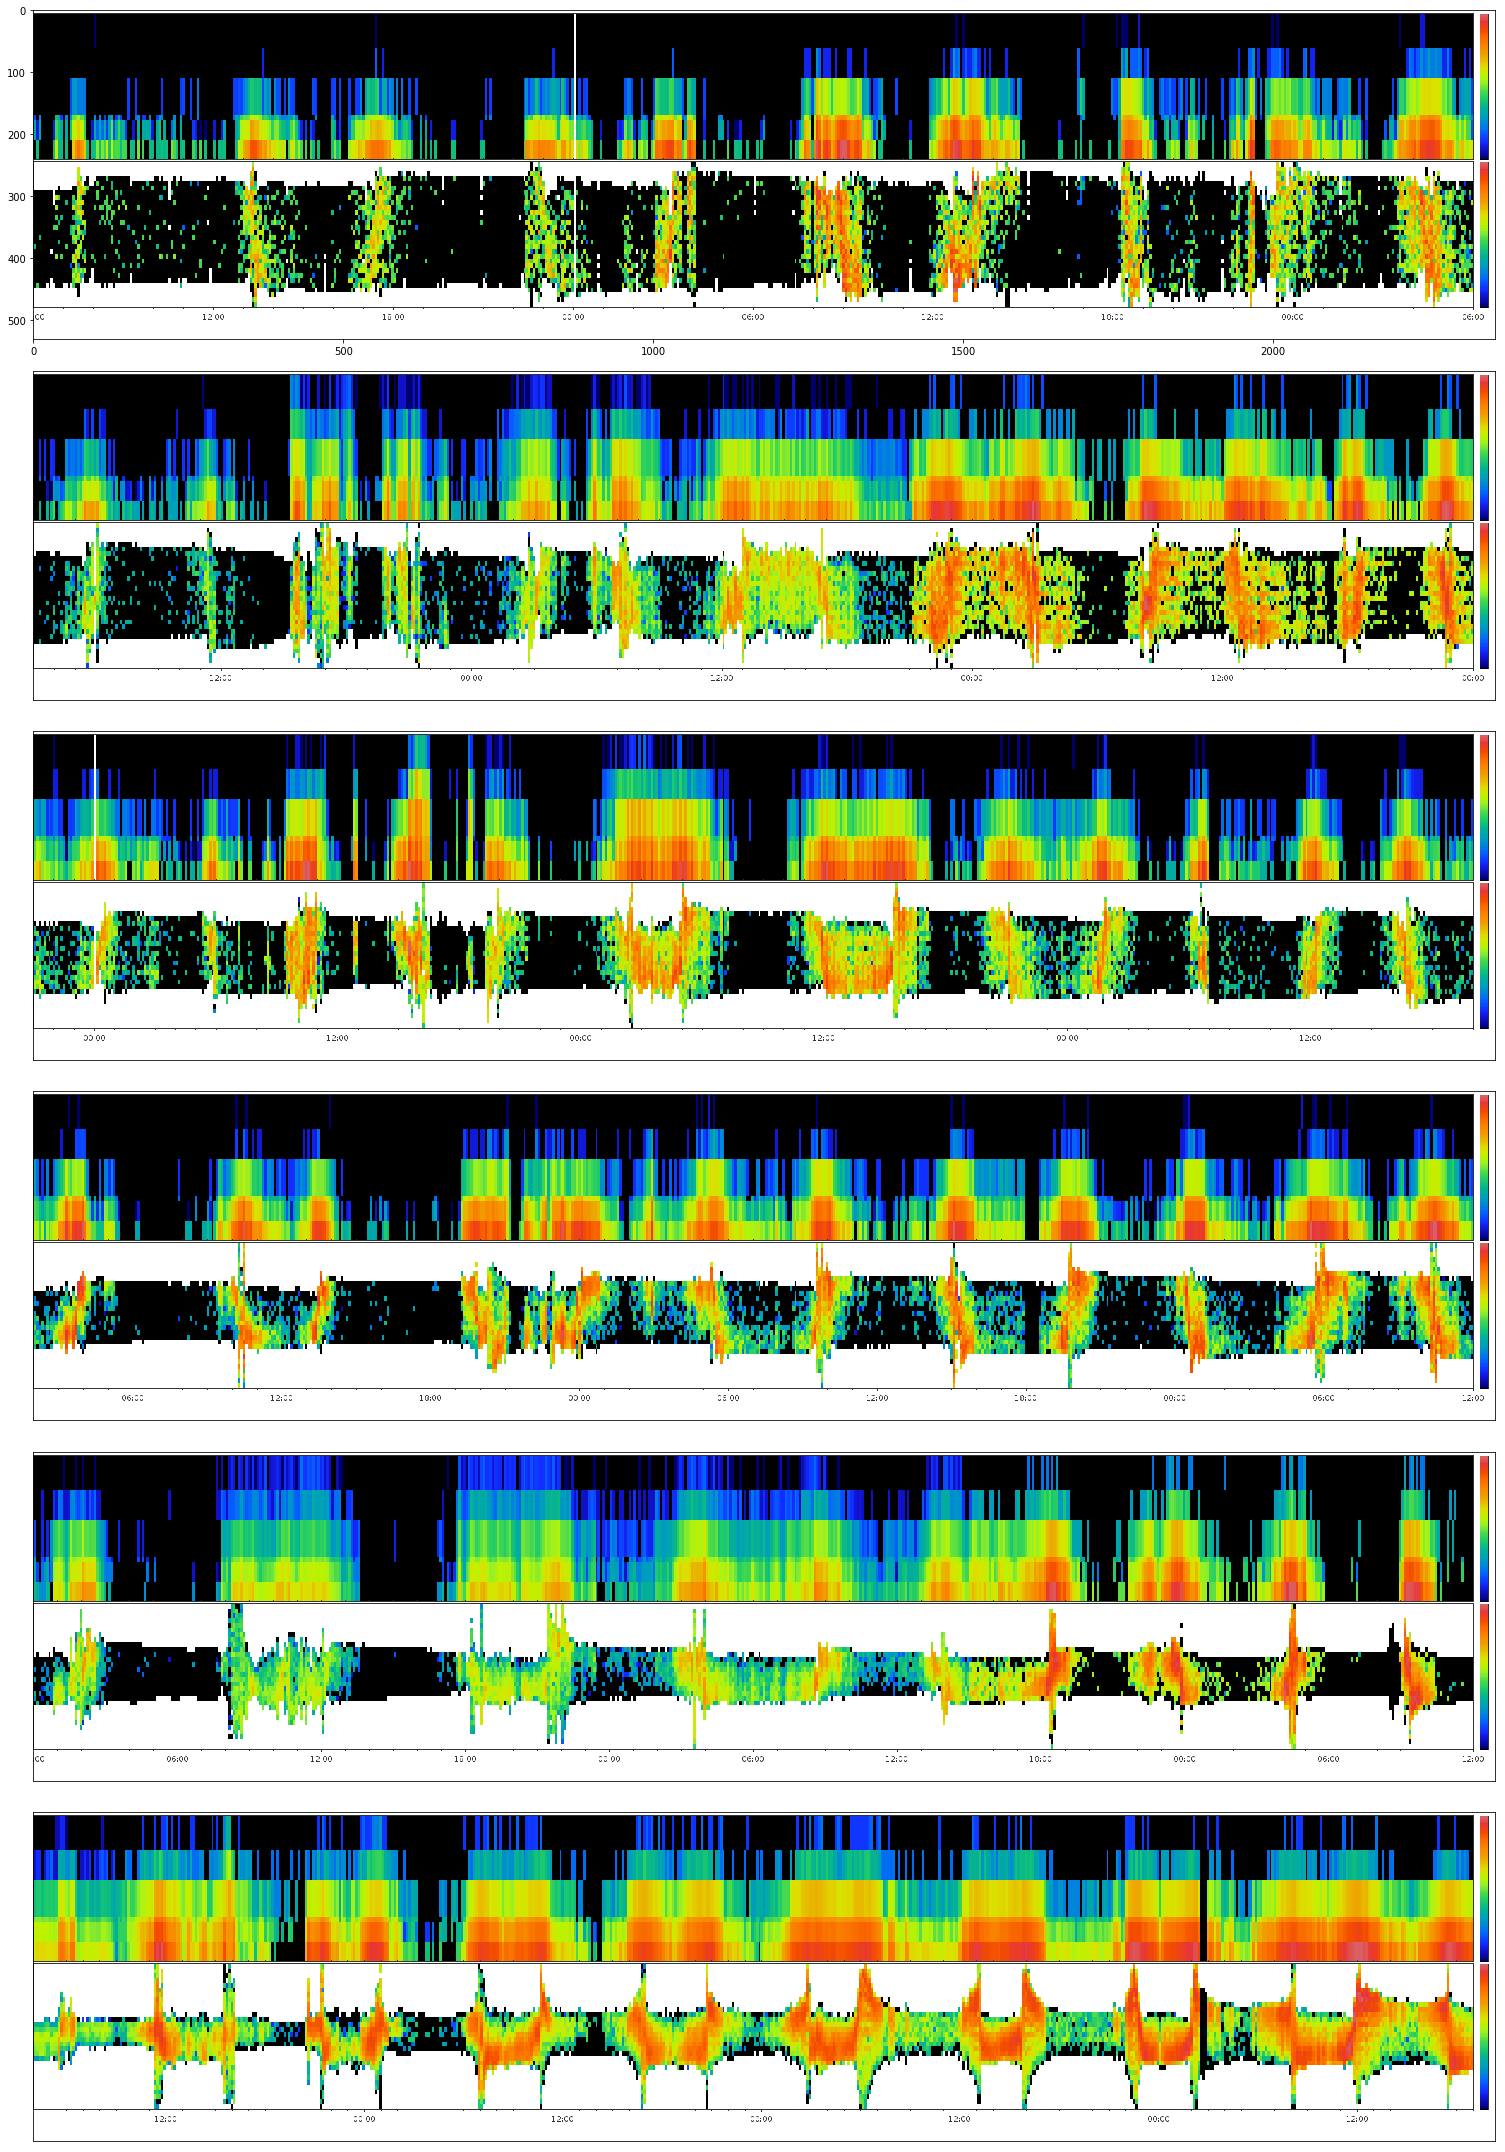

In [203]:
fig,ax = plt.subplots(6,1,figsize=(50,30))

ax[0].imshow(img7)
#ax[0].xaxis.set_visible(False)
#ax[0].yaxis.set_visible(False)
ax[1].imshow(img8)
ax[1].xaxis.set_visible(False)
ax[1].yaxis.set_visible(False)
ax[2].imshow(img9)
ax[2].xaxis.set_visible(False)
ax[2].yaxis.set_visible(False)
ax[3].imshow(img10)
ax[3].xaxis.set_visible(False)
ax[3].yaxis.set_visible(False)
ax[4].imshow(img11)
ax[4].xaxis.set_visible(False)
ax[4].yaxis.set_visible(False)
ax[5].imshow(img12)
ax[5].xaxis.set_visible(False)
ax[5].yaxis.set_visible(False)
plt.tight_layout()

#fig.savefig('En_PA_Orbit7-12_O.png',bbox_inches='tight')